In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftest = pd.read_csv('test_technidus_clf.csv')
dftrain = pd.read_csv('train_technidus_clf.csv')

In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7686 entries, 0 to 7685
Data columns (total 25 columns):
CustomerID              7685 non-null float64
Title                   41 non-null object
FirstName               7685 non-null object
MiddleName              4457 non-null object
LastName                7685 non-null object
Suffix                  1 non-null object
AddressLine1            7685 non-null object
AddressLine2            135 non-null object
City                    7685 non-null object
StateProvinceName       7685 non-null object
CountryRegionName       7685 non-null object
PostalCode              7685 non-null object
PhoneNumber             7685 non-null object
BirthDate               7685 non-null object
Education               7685 non-null object
Occupation              7685 non-null object
Gender                  7685 non-null object
MaritalStatus           7685 non-null object
HomeOwnerFlag           7685 non-null float64
NumberCarsOwned         7685 non-null floa

There are 7686 customers. Title, Middle name and Suffix have null values. These particular information are not needed for this analysis so they will be dropped from the dataset.

In [4]:

# Let us make sure that there are no customers that appear more than once in our dataset
idsUnique = len(set(dftrain.CustomerID))
idsTotal = dftrain.shape[0]
idsDupli = idsTotal - idsUnique
print('There are %s duplictes in our dataset'%(idsDupli))

#check two, we expect unique instances in Customer id to be equal to dataset size
print( "There are %s unique ids and the size of the dataset is %d " %(len(dftrain.CustomerID.unique()), len(dftrain)))


There are 0 duplictes in our dataset
There are 7686 unique ids and the size of the dataset is 7686 


In [5]:
dftrain.isnull().sum()

CustomerID                 1
Title                   7645
FirstName                  1
MiddleName              3229
LastName                   1
Suffix                  7685
AddressLine1               1
AddressLine2            7551
City                       1
StateProvinceName          1
CountryRegionName          1
PostalCode                 1
PhoneNumber                1
BirthDate                  1
Education                  1
Occupation                 1
Gender                     1
MaritalStatus              1
HomeOwnerFlag              1
NumberCarsOwned            1
NumberChildrenAtHome       1
TotalChildren              1
YearlyIncome               1
AveMonthSpend              1
BikeBuyer                  0
dtype: int64

Now we can see that for some customers, we dont have information on their Title, Middle name, Suffix and AddressLine 2 as indicated by the number of null values.
These missing information are not too worrisome as they don't seem to be strong indicators on how much a person spends on avaerage in a month at a bike shop. However, lets try to understand why they are missing.
So for Title, Suffix and Middle name, it is possible that when these were filled (assuming these information on customers were collected via self-form filling) the users didnt fill them or that they dont have middle names or suffixes so it did not apply to them.
For address line 2, it is usually unecessary to fill unless you live in an apartment or condominium, where you'll need to fill in your aprtment number of floor number. Most people fill up Adress line 1, which is the case in our dataset and probably implies that not a lot of people in our dataset live in apartments or condos.

In [6]:
dftrain[dftrain.isnull().any(axis=1)]

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,14540.0,NaN,Randy,NaN,Lin,NaN,8848 Auburn,NaN,London,England,...,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1
1,18054.0,NaN,Jake,NaN,Zeng,NaN,4058 First Ave,NaN,Cliffside,British Columbia,...,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0
2,16955.0,NaN,Nathaniel,NaN,Bradley,NaN,3679 Diablo View Road,NaN,Metchosin,British Columbia,...,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0
3,11626.0,NaN,Destiny,NaN,Rogers,NaN,3588 Vancouver Way,NaN,San Francisco,California,...,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0
4,18651.0,NaN,Isaiah,A,Mitchell,NaN,5014 Steele Drive,NaN,Lynnwood,Washington,...,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0
5,17277.0,NaN,Nichole,A,Goel,NaN,2511 Via Appia,NaN,North Ryde,New South Wales,...,Management,F,M,1.0,0.0,0.0,1.0,119901.0,56.0,1
6,20802.0,NaN,Jon,NaN,Li,NaN,"191, rue de Cambrai",NaN,Bobigny,Seine Saint Denis,...,Manual,M,S,1.0,0.0,0.0,2.0,10737.0,59.0,0
7,24581.0,NaN,Reginald,A,Diaz,NaN,8742 Longbrood Way,NaN,Oxford,England,...,Professional,M,M,1.0,4.0,5.0,5.0,146872.0,159.0,1
8,20068.0,NaN,Alexandria,F,Peterson,NaN,7480 Violet Ct,NaN,Novato,California,...,Clerical,F,S,1.0,2.0,3.0,3.0,49155.0,62.0,0
9,29128.0,NaN,Alyssa,NaN,Reed,NaN,2559 Gumwood,NaN,Grossmont,California,...,Management,F,M,1.0,3.0,1.0,1.0,148083.0,62.0,0


In [7]:
#Now that we know more about the missing information on our customers, we need to handle it
#We already know that the missing information are not strong indicators for what we are trying to predict so we can just leave them as they are
#However, we drop the suffix information seeing as all customersin the data do not have it
dftrain = dftrain.drop( axis = 1, columns = ['CustomerID','Suffix','Title','AddressLine2','MiddleName'])
dftrain = dftrain.dropna()
dftrain.head()

,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,Randy,Lin,8848 Auburn,London,England,United Kingdom,W1Y 3RA,1 (11) 500 555-0138,4/18/1958,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1
1,Jake,Zeng,4058 First Ave,Cliffside,British Columbia,Canada,V8Y 1L1,987-555-0118,10/6/1960,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0
2,Nathaniel,Bradley,3679 Diablo View Road,Metchosin,British Columbia,Canada,V9,145-555-0167,8/18/1969,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0
3,Destiny,Rogers,3588 Vancouver Way,San Francisco,California,United States,94109,262-555-0170,6/14/1973,Graduate Degree,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0
4,Isaiah,Mitchell,5014 Steele Drive,Lynnwood,Washington,United States,98036,694-555-0195,5/6/1955,High School,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0


In [8]:
dftrain.dtypes

FirstName                object
LastName                 object
AddressLine1             object
City                     object
StateProvinceName        object
CountryRegionName        object
PostalCode               object
PhoneNumber              object
BirthDate                object
Education                object
Occupation               object
Gender                   object
MaritalStatus            object
HomeOwnerFlag           float64
NumberCarsOwned         float64
NumberChildrenAtHome    float64
TotalChildren           float64
YearlyIncome            float64
AveMonthSpend           float64
BikeBuyer                 int64
dtype: object

In [9]:
#Look at numerical columns

dftrain.describe()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000,7685.000000
mean,0.696682,1.569031,1.230839,2.151464,82323.659206,76.383995,0.496291
std,0.459721,1.177871,1.650189,1.727375,40368.317414,29.367313,0.500019
min,0.000000,0.000000,0.000000,0.000000,10063.000000,26.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,50784.000000,53.000000,0.000000
50%,1.000000,2.000000,0.000000,2.000000,82158.000000,71.000000,0.000000
75%,1.000000,2.000000,2.000000,4.000000,109389.000000,89.000000,1.000000
max,1.000000,4.000000,5.000000,5.000000,193721.000000,176.000000,1.000000


Home owner flag, Numbers of Cars owned, Number of Children at home and Total Children all seem like categorical values. So we will use a label encoder to change them.

# EDA: Univariate  and Multivariate analysis

0    50.0
1    50.0
Name: BikeBuyer, dtype: float64


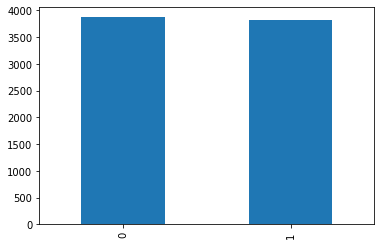

In [198]:
#is the data balanced
print(round(dftrain.BikeBuyer.value_counts(normalize = True)*100))
dftrain['BikeBuyer'].value_counts().plot(kind = 'bar');

yes, the data is balanced.

In [11]:
#cat_cols = [col for col in dftrain.columns if dftrain[col].dtype == "object"]
cat_cols = ['CountryRegionName','Education','Occupation','Gender','MaritalStatus']

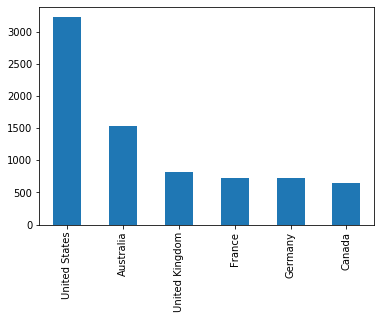

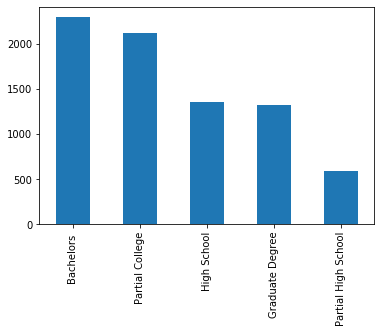

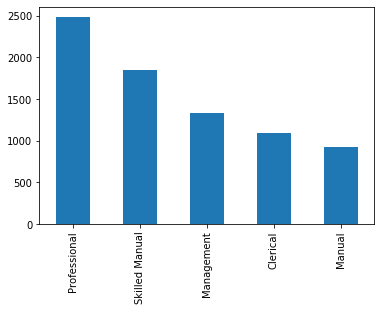

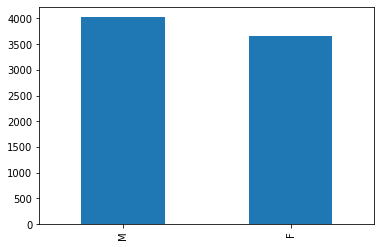

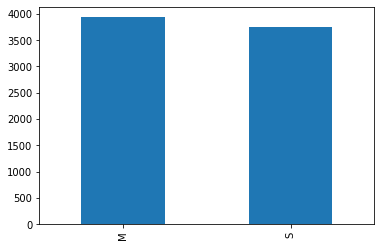

In [12]:
#fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (35,20))ax = axes [i//3,i%3]

for col in cat_cols:
    dftrain[col].value_counts().plot(kind = 'bar', label='{}'.format(col))
    plt.show();

In [13]:
#We can see that we have been given birthdates of our customers instead of their age, however we can derive their age with this 
#We will need to convert the birthdate which is stored as a sring object into a datetime data type, so we can get an age column out of it
dftrain.BirthDate = pd.to_datetime(dftrain.BirthDate, format='%m/%d/%Y')
print(dftrain.BirthDate.dtype) #check to see if the conversion was sucessful

#now that it is converted we can get the age of the customers 
dftrain['Age'] = pd.to_datetime('today').year - dftrain.BirthDate.dt.year
dftrain['Age'].head(4) #check

datetime64[ns]


0    61
1    59
2    50
3    46
Name: Age, dtype: int64

No handles with labels found to put in legend.


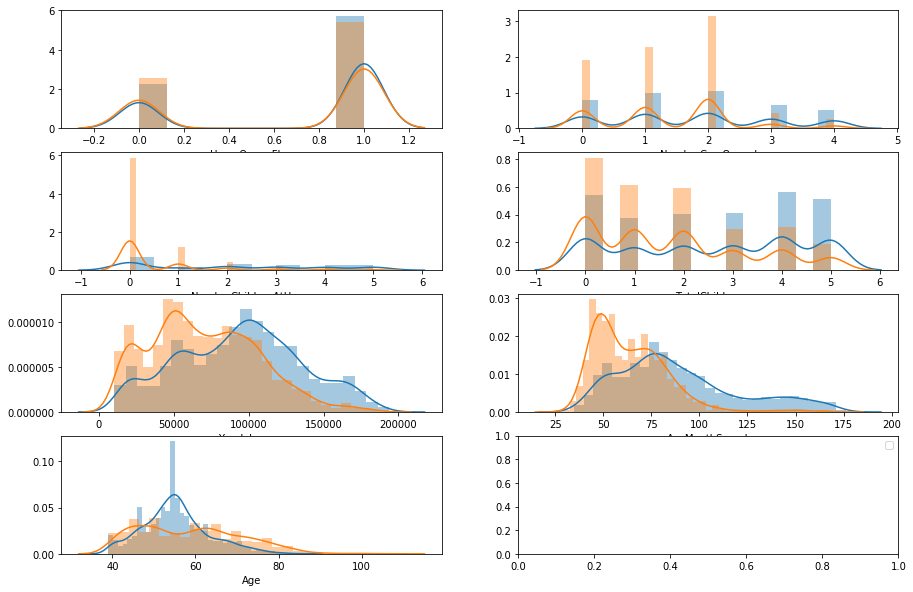

In [201]:

num_cols = ['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend','Age']


#View the distribution of the two classes (Bike Buyer (BLUE) and Non-Bike Buyer(ORANGE)) in all the features 
fig, axes = plt.subplots(nrows=4, ncols=2,figsize = (15,10))
for i, col in enumerate(num_cols):
    for x in dftrain.BikeBuyer.unique():
        sns.distplot(dftrain[col][dftrain.BikeBuyer==x], ax=axes[i//2, i%2],kde=1,label='{}'.format(x),)
plt.legend();
plt.show();

We can see the features that have different distributions of each of the classes. There is no clear split, but we can observe features that have a somewhat defined split such as Number of Cars, Children at Home, YearlyIncome, Aveage monthly spend, and Age. With, Age we can see an important group emerging in the 50 - 60's age group.

# Feature Selection and Preprocessing

In [205]:
dftrain.columns

Index(['FirstName', 'LastName', 'AddressLine1', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age'],
      dtype='object')

In [203]:
# amke a copy of the dataframe and drop columns that don't have a strong predictive power.
train = dftrain.copy()
train = dftrain.drop( axis = 1, columns = ['FirstName', 
                                           'LastName',
                                           'City','BirthDate', 'StateProvinceName',
                                           'AddressLine1','PhoneNumber',
                                          'PostalCode'])
train.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,United Kingdom,Bachelors,Manual,M,M,1.0,0.0,0.0,1.0,35455.0,70.0,1,61
1,Canada,Bachelors,Professional,M,S,0.0,1.0,0.0,0.0,43980.0,69.0,0,59
2,Canada,Bachelors,Skilled Manual,M,M,1.0,0.0,2.0,2.0,57713.0,102.0,0,50
3,United States,Graduate Degree,Skilled Manual,F,M,1.0,0.0,0.0,1.0,53438.0,49.0,0,46
4,United States,High School,Clerical,M,M,0.0,2.0,0.0,1.0,55291.0,73.0,0,64


In [204]:
#Using crosstab allows for identifying groups in a feature that are responsible for the predictive power of that feature. 
pd.crosstab(train.NumberCarsOwned, train.BikeBuyer,  normalize = 'index')

BikeBuyer,0,1
NumberCarsOwned,,
0.0,0.546104,0.453896
1.0,0.539901,0.460099
2.0,0.602539,0.397461
3.0,0.256659,0.743341
4.0,0.200957,0.799043


For example, we can see that 2 or less cars hold highe predictive power for non-buyers or simply put, if a customer has 2 or less cars they are more likely to not be a bike buyer(0) than they are to be bike buyers (1)

In [19]:
pd.crosstab(train.CountryRegionName, train.BikeBuyer, normalize = 'index')

BikeBuyer,0,1
CountryRegionName,,
Australia,0.438517,0.561483
Canada,0.491473,0.508527
France,0.556772,0.443228
Germany,0.476584,0.523416
United Kingdom,0.482927,0.517073
United States,0.536578,0.463422


In [20]:
pd.crosstab([train.CountryRegionName], train.BikeBuyer, normalize = 'index')

BikeBuyer,0,1
CountryRegionName,,
Australia,0.438517,0.561483
Canada,0.491473,0.508527
France,0.556772,0.443228
Germany,0.476584,0.523416
United Kingdom,0.482927,0.517073
United States,0.536578,0.463422


In [21]:
pd.crosstab([train.NumberCarsOwned], train.BikeBuyer, normalize = 'index')

BikeBuyer,0,1
NumberCarsOwned,,
0.0,0.546104,0.453896
1.0,0.539901,0.460099
2.0,0.602539,0.397461
3.0,0.256659,0.743341
4.0,0.200957,0.799043


In [22]:
print(train.Occupation.value_counts())
pd.crosstab([train.Occupation], train.BikeBuyer, normalize = 'index')

Professional      2485
Skilled Manual    1845
Management        1330
Clerical          1095
Manual             930
Name: Occupation, dtype: int64


BikeBuyer,0,1
Occupation,,
Clerical,0.619178,0.380822
Management,0.454135,0.545865
Manual,0.615054,0.384946
Professional,0.389537,0.610463
Skilled Manual,0.568564,0.431436


In [23]:
print(train.Education.value_counts())
pd.crosstab([train.Education], train.BikeBuyer, normalize = 'index')

Bachelors              2294
Partial College        2117
High School            1361
Graduate Degree        1324
Partial High School     589
Name: Education, dtype: int64


BikeBuyer,0,1
Education,,
Bachelors,0.428945,0.571055
Graduate Degree,0.533233,0.466767
High School,0.540044,0.459956
Partial College,0.508266,0.491734
Partial High School,0.628183,0.371817


In [24]:
train.columns

Index(['CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
       'AveMonthSpend', 'BikeBuyer', 'Age'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c74e7f0>,
      dtype=object)

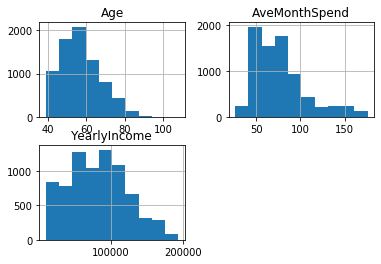

In [25]:
train[['AveMonthSpend','Age','YearlyIncome']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f9c4d30>,
      dtype=object)

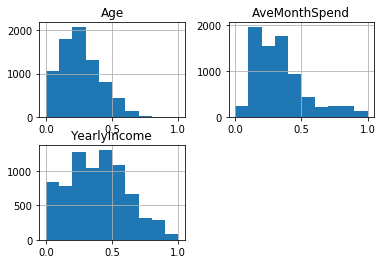

In [26]:

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


train['AveMonthSpend'] =  scaler.fit_transform(train['AveMonthSpend'].values.reshape(-1,1))
train['Age'] =  scaler.fit_transform(train['Age'].values.reshape(-1,1))
train['YearlyIncome'] =  scaler.fit_transform(train['YearlyIncome'].values.reshape(-1,1))
train[['AveMonthSpend','Age','YearlyIncome']].hist()


In [27]:
#Store the features to be used for classification in X


X = train[['CountryRegionName','Age', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'YearlyIncome',
       'AveMonthSpend']]

In [28]:
#convert cat columns to one hot encoding

col = ['CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome']
X=pd.get_dummies(X, columns=col,prefix=col)

In [29]:
X.head()

,Age,YearlyIncome,AveMonthSpend,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,...,NumberCarsOwned_1.0,NumberCarsOwned_2.0,NumberCarsOwned_3.0,NumberCarsOwned_4.0,NumberChildrenAtHome_0.0,NumberChildrenAtHome_1.0,NumberChildrenAtHome_2.0,NumberChildrenAtHome_3.0,NumberChildrenAtHome_4.0,NumberChildrenAtHome_5.0
0,0.318841,0.138257,0.293333,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.289855,0.184675,0.286667,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,0.159420,0.259450,0.506667,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.101449,0.236173,0.153333,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.362319,0.246262,0.313333,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [30]:
Y = np.ravel(train.BikeBuyer)
Y

array([1, 0, 0, ..., 0, 0, 1])

In [31]:
dftrain.BikeBuyer.value_counts(normalize = True)

0    0.503709
1    0.496291
Name: BikeBuyer, dtype: float64

In [32]:
print(dftrain.BikeBuyer.mean())
print(1 - dftrain.BikeBuyer.mean())

0.4962914769030579
0.503708523096942


In [33]:
#Baseline score of a model that always predicts non-Buyer
max(dftrain.BikeBuyer.mean(), 1 - dftrain.BikeBuyer.mean())

0.503708523096942

In [34]:
from sklearn.model_selection import train_test_split

#split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#check the shape of the train and validation data 
print('The size of the train features data is:',X_train.shape)
print('The size of the test features data is:',X_test.shape)
print('---------------------------------------')
print('The size of the train target data is:', y_train.shape)
print('The size of the test target data is:', y_test.shape)

The size of the train features data is: (5148, 36)
The size of the test features data is: (2537, 36)
---------------------------------------
The size of the train target data is: (5148,)
The size of the test target data is: (2537,)


# DECLARING EVALUATION METHODS




## Learning Curve Plot method

In [35]:
# Cross validate model with Kfold stratified cross val
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

from sklearn.model_selection import learning_curve 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



## Cross-validation method

In [36]:
#score of the model
from sklearn.model_selection import cross_val_score

def cross_val(model,X,Y):
  scores = list(-1* cross_val_score(model,X, Y, cv = 5, scoring = 'accuracy'))
  accuracy = []
  for acc in scores:
    accuracy.append(acc)
  print(accuracy)
  arr = np.array(accuracy)
  return print(arr.mean())

## Bayesian Optimization

In [37]:
!pip install bayesian-optimization

In [38]:

from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def test(max_depth, min_samples_split,min_samples_leaf, X, y):
 
    estimator = DecisionTreeClassifier(max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf, random_state = 42)
    cval = cross_val_score(estimator, train_X, train_Y,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_test(X,y):
    def test_cv(max_depth, min_samples_split, min_samples_leaf):
       
        return test(max_depth = int(max_depth),
                min_samples_split = float(min_samples_split),
                min_samples_leaf = int(min_samples_leaf),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={
            "max_depth": (5, 15),
            "min_samples_split": (0.1, 1.0),
            "min_samples_leaf": (1, 15),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

# MODELS USED

### LOGISTIC REGRESSION


In [199]:
from sklearn.linear_model import LogisticRegression #Logistic Regression


def test(C, X, y):
 
    estimator = LogisticRegression(C = C,
                                   penalty = 'l2',
                                   solver = 'liblinear',
                                   random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_test(X,y):
    def test_cv(C):
       
        return test(C = C, 
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={
            "C": (0.001, 1000)
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [200]:
optimize_test(X_train,y_train)

|   iter    |  target   |     C     |
-------------------------------------
|  1        |  0.7619   |  191.5    |
|  2        |  0.7619   |  622.1    |
|  3        |  0.7619   |  437.7    |
|  4        |  0.7619   |  785.4    |
|  5        |  0.7619   |  780.0    |
|  6        |  0.7596   |  0.04606  |
|  7        |  0.7619   |  1e+03    |
|  8        |  0.7619   |  999.9    |
|  9        |  0.7619   |  1e+03    |
|  10       |  0.7619   |  1e+03    |
|  11       |  0.7619   |  1e+03    |
|  12       |  0.7619   |  999.9    |
|  13       |  0.7619   |  999.8    |
|  14       |  0.7619   |  999.8    |
|  15       |  0.7619   |  1e+03    |
Final result: {'target': 0.7619127490720465, 'params': {'C': 191.52025885944192}}


In [39]:
#Train the model with the best parameters found using Bayes Optimization
LR = LogisticRegression(C =  int(191.52025885944192), penalty = 'l2', solver = 'liblinear')
LR.fit(X_train, y_train)

LogisticRegression(C=191, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
cross_val(LR, X,Y)

[-0.7477243172951885, -0.7631750162654521, -0.7547169811320755, -0.7625243981782693, -0.759765625]
-0.7575812675741971


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

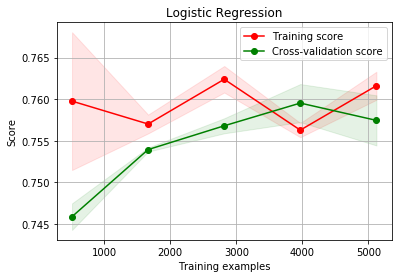

In [41]:
plot_learning_curve(LR, "Logistic Regression", X, Y)

|   iter    |  target   |     C     |
-------------------------------------
|  1        |  0.7619   |  191.5    |
|  2        |  0.7619   |  622.1    |
|  3        |  0.7619   |  437.7    |
|  4        |  0.7619   |  785.4    |
|  5        |  0.7619   |  780.0    |
|  6        |  0.7596   |  0.04606  |
|  7        |  0.7619   |  1e+03    |
|  8        |  0.7619   |  999.9    |
|  9        |  0.7619   |  1e+03    |
|  10       |  0.7619   |  1e+03    |
|  11       |  0.7619   |  1e+03    |
|  12       |  0.7619   |  999.9    |
|  13       |  0.7619   |  999.8    |
|  14       |  0.7619   |  999.8    |
|  15       |  0.7619   |  1e+03    |
Final result: {'target': 0.7619127490720465, 'params': {'C': 191.52025885944192}}


# DECISION TREE

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [44]:
from sklearn.tree import DecisionTreeClassifier
def test(max_depth, min_samples_split,min_samples_leaf, X, y):
 
    estimator = DecisionTreeClassifier(max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf, random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_testDT(X,y):
    def test_cv(max_depth, min_samples_split, min_samples_leaf):
       
        return test(max_depth = int(max_depth),
                min_samples_split = float(min_samples_split),
                min_samples_leaf = int(min_samples_leaf),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={
            "max_depth": (5, 15),
            "min_samples_split": (0.1, 1.0),
            "min_samples_leaf": (1, 15),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [45]:
optimize_testDT(X_train,y_train)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
|  1        |  0.6886   |  6.915    |  9.71     |  0.494    |
|  2        |  0.7162   |  12.85    |  11.92    |  0.3453   |
|  3        |  0.6697   |  7.765    |  12.23    |  0.9623   |
|  4        |  0.6886   |  13.76    |  6.009    |  0.5509   |
|  5        |  0.6886   |  11.83    |  10.98    |  0.4332   |
|  6        |  0.7529   |  5.0      |  1.0      |  0.1      |
|  7        |  0.6697   |  15.0     |  15.0     |  1.0      |
|  8        |  0.7493   |  15.0     |  1.0      |  0.1      |
|  9        |  0.7485   |  5.0      |  15.0     |  0.1      |
|  10       |  0.7501   |  9.863    |  1.0      |  0.1      |
|  11       |  0.7489   |  10.39    |  15.0     |  0.1      |
|  12       |  0.7529   |  5.0      |  4.38     |  0.1      |
|  13       |  0.7505   |  15.0     |  11.53    |  0.1      |
|  14       |  0.754    |  5.0      |  12.55    |  0.1      |
|  15   

In [46]:
#Train the model with the best parameters found using Bayes Optimization


DT = DecisionTreeClassifier(max_depth= int(5.000000000002133), 
                             min_samples_leaf= int(11.43540559265308,), 
                            min_samples_split= 2)
DT.fit(X_train, y_train)


cross_val(DT, X,Y)

[-0.7626788036410923, -0.756668835393624, -0.7657774886141835, -0.7592713077423552, -0.7643229166666666]
-0.7617438704115843


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

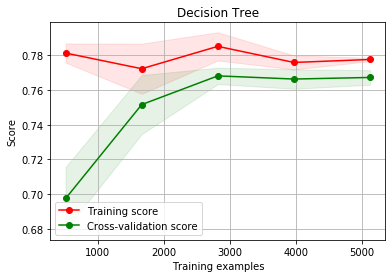

In [47]:
plot_learning_curve(DT, "Decision Tree", X, Y)

# RandomForest Classifier

'n_estimators': [70],
                                   'min_samples_split': [0.1,0.2, 2],
                                   'min_samples_leaf': [1,2],
                                   'max_depth': [20,None],
                                   'bootstrap': [False], 'random_state': [42]

In [48]:
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
def test(n_estimators, max_depth, min_samples_split,min_samples_leaf, X, y):
 
    estimator = RandomForestClassifier(n_estimators = n_estimators,max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf, random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_testRF(X,y):
    def test_cv(n_estimators,max_depth, min_samples_split, min_samples_leaf):
       
        return test(n_estimators = int(n_estimators),
                    max_depth = int(max_depth),
                min_samples_split = float(min_samples_split),
                min_samples_leaf = int(min_samples_leaf),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={"n_estimators": (10,100),
            "max_depth": (1, 20),
            "min_samples_split": (0.1, 1.0),
            "min_samples_leaf": (1, 15),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [49]:
optimize_testRF(X_train,y_train)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.7193   |  4.639    |  9.71     |  0.494    |  80.68    |
|  2        |  0.7339   |  15.82    |  4.816    |  0.3488   |  82.17    |
|  3        |  0.7339   |  19.2     |  13.26    |  0.422    |  55.09    |
|  4        |  0.7312   |  13.99    |  10.98    |  0.4332   |  60.51    |
|  5        |  0.5045   |  10.56    |  1.193    |  0.7955   |  89.44    |
|  6        |  0.7138   |  1.0      |  1.0      |  0.1      |  10.0     |
|  7        |  0.503    |  20.0     |  15.0     |  1.0      |  10.0     |
|  8        |  0.7607   |  20.0     |  15.0     |  0.1      |  100.0    |
|  9        |  0.7292   |  1.0      |  15.0     |  0.1      |  28.04    |
|  10       |  0.5045   |  20.0     |  15.0     |  1.0      |  78.15    |
|  11       |  0.7678   |  20.0     |  1.0      |  0.1      |  34.97    |
|  12       |  0.7272   |  1.0      | 

In [50]:

#Train the model with the best parameters found using Bayes Optimization

RF = RandomForestClassifier(max_depth = int(20.0),
                            min_samples_leaf = int(1.0), 
                            min_samples_split = 0.1, 
                            n_estimators = int(34.97447886623414))
RF.fit(X_train, y_train)
cross_val(RF, X,Y)

[-0.7477243172951885, -0.7547169811320755, -0.7592713077423552, -0.7722836694860117, -0.7552083333333334]
-0.7578409217977928


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

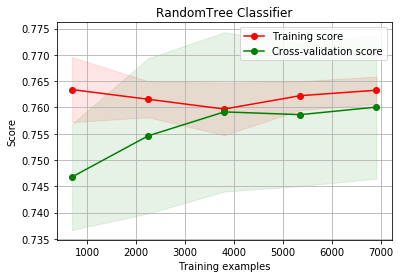

In [51]:
plot_learning_curve(RF,"RandomTree Classifier",X,Y,cv=kfold)

# Extra Trees Classifier

In [52]:
from sklearn.ensemble import ExtraTreesClassifier #ExtraTrees Classifier
def test(n_estimators, max_depth, min_samples_split,min_samples_leaf, X, y):
 
    estimator = ExtraTreesClassifier(n_estimators = n_estimators,max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf, random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_testET(X,y):
    def test_cv(n_estimators,max_depth, min_samples_split, min_samples_leaf):
       
        return test(n_estimators = int(n_estimators),
                    max_depth = int(max_depth),
                min_samples_split = float(min_samples_split),
                min_samples_leaf = int(min_samples_leaf),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={"n_estimators": (10,100),
            "max_depth": (1, 20),
            "min_samples_split": (0.1, 1.0),
            "min_samples_leaf": (1, 15),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [53]:
optimize_testET(X_train,y_train)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.7434   |  4.639    |  9.71     |  0.494    |  80.68    |
|  2        |  0.7418   |  15.82    |  4.816    |  0.3488   |  82.17    |
|  3        |  0.7363   |  19.2     |  13.26    |  0.422    |  55.09    |
|  4        |  0.7395   |  13.99    |  10.98    |  0.4332   |  60.51    |
|  5        |  0.7304   |  10.56    |  1.193    |  0.7955   |  89.44    |
|  6        |  0.7312   |  19.31    |  14.78    |  0.7245   |  99.76    |
|  7        |  0.7012   |  2.445    |  1.009    |  0.1113   |  10.25    |
|  8        |  0.7383   |  1.29     |  14.84    |  0.1189   |  59.65    |
|  9        |  0.7308   |  19.73    |  14.9     |  0.9643   |  76.61    |
|  10       |  0.754    |  19.8     |  1.002    |  0.1512   |  42.17    |
|  11       |  0.7603   |  19.87    |  1.979    |  0.1386   |  11.95    |
|  12       |  0.7607   |  19.92    | 

In [54]:
#Train the model with the best parameters found using Bayes Optimization


ET = ExtraTreesClassifier(n_estimators = int(42.16249194511828), 
                          max_depth = int(14.287885111668368),
                          random_state = 42,
                          min_samples_split = float(0.11797013394300811),
                         min_samples_leaf = int(1.0346428875244573))
ET.fit(X_train, y_train)
cross_val(ET, X,Y)

[-0.7444733420026007, -0.7508132726089786, -0.752765126870527, -0.7644762524398179, -0.7532552083333334]
-0.7531566404510515


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

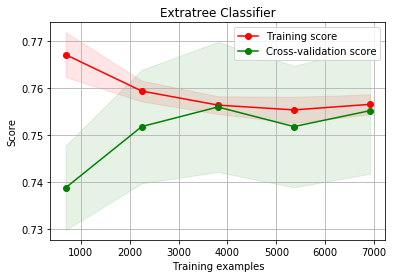

In [55]:
plot_learning_curve(ET,"Extratree Classifier",X,Y,cv=kfold)

# AdaBoosting Classifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier #AdaBoost Classifier
def test(learning_rate, n_estimators, X, y):
 
    estimator = AdaBoostClassifier(learning_rate = learning_rate,
                                     n_estimators = n_estimators,
                                     base_estimator = DT,
                                     random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_testADC(X,y):
    def test_cv(learning_rate, n_estimators):
       
        return test(learning_rate = float(learning_rate),
            n_estimators = int(n_estimators),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={"learning_rate": (0.01, 1),
            "n_estimators": (10,100)},
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [57]:
optimize_testADC(X_train,y_train)

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.7387   |  0.1996   |  65.99    |
|  2        |  0.7205   |  0.4434   |  80.68    |
|  3        |  0.7067   |  0.7822   |  34.53    |
|  4        |  0.717    |  0.2837   |  82.17    |
|  5        |  0.7264   |  0.9586   |  88.83    |
|  6        |  0.7276   |  1.0      |  10.0     |
|  7        |  0.7115   |  0.9923   |  99.99    |
|  8        |  0.7209   |  1.0      |  53.79    |
|  9        |  0.7694   |  0.0138   |  18.73    |
|  10       |  0.73     |  0.9952   |  20.3     |
|  11       |  0.7639   |  0.01     |  14.34    |
|  12       |  0.7698   |  0.01     |  25.15    |
|  13       |  0.7627   |  0.01     |  10.0     |
|  14       |  0.7682   |  0.01     |  22.47    |
|  15       |  0.7686   |  0.01019  |  26.39    |
Final result: {'target': 0.7698154964357266, 'params': {'learning_rate': 0.01, 'n_estimators': 25.15185113811051}}


In [58]:
#Train the model with the best parameters found using Bayes Optimization

ADC_DT = AdaBoostClassifier( base_estimator= DT,
                            n_estimators = int(42.487357183200814), 
                         learning_rate = 0.010504172579821138,
                         random_state = 42)

ADC_DT.fit(X_train, y_train)
cross_val(ADC_DT, X,Y)

[-0.758777633289987, -0.7755367599219258, -0.7755367599219258, -0.7709824333116461, -0.767578125]
-0.769682342289097


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

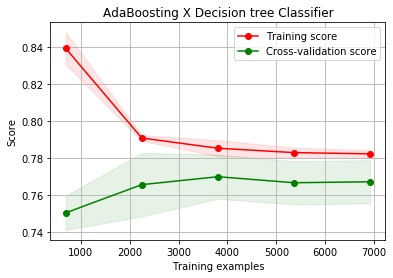

In [59]:
plot_learning_curve(ADC_DT,"AdaBoosting X Decision tree Classifier",X,Y,cv=kfold)

# Gradient Boosting Classifier 

In [60]:
from sklearn.ensemble import GradientBoostingClassifier #Gradient Booster Classifier
def test(learning_rate, n_estimators, max_depth, min_samples_split,min_samples_leaf, X, y):
 
    estimator = GradientBoostingClassifier(learning_rate=learning_rate,
                                           n_estimators = n_estimators,max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf, random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_testGB(X,y):
    def test_cv(learning_rate, n_estimators,max_depth, min_samples_split, min_samples_leaf):
       
        return test(learning_rate = float(learning_rate),
                    n_estimators = int(n_estimators),
                    max_depth = int(max_depth),
                min_samples_split = float(min_samples_split),
                min_samples_leaf = int(min_samples_leaf),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={"learning_rate": (0.01, 1),
                 "n_estimators": (10,1000),
            "max_depth": (1, 20),
            "min_samples_split": (0.1, 1.0),
            "min_samples_leaf": (1, 15),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)

In [61]:
optimize_testGB(X_train,y_train)

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.7753   |  0.1996   |  12.82    |  7.128    |  0.8068   |  782.2    |
|  2        |  0.7737   |  0.2799   |  6.253    |  12.23    |  0.9623   |  877.2    |
|  3        |  0.767    |  0.3642   |  10.52    |  10.57    |  0.7414   |  376.5    |
|  4        |  0.756    |  0.5656   |  10.56    |  1.193    |  0.7955   |  883.8    |
|  5        |  0.7308   |  0.3712   |  12.69    |  2.055    |  0.4319   |  933.8    |
|  6        |  0.6748   |  0.01     |  1.0      |  15.0     |  1.0      |  10.0     |
|  7        |  0.7737   |  0.9426   |  1.015    |  14.31    |  0.3201   |  580.2    |
|  8        |  0.7666   |  0.9943   |  1.068    |  14.8     |  0.8402   |  230.3    |
|  9        |  0.7576   |  0.01     |  1.0      |  15.0     |  0.1      |  767.9    |
|  10       |  0.7631   |  1.0      |  19.85    |  1.0

In [62]:
#Train the model with the best parameters found using Bayes Optimization

GB = GradientBoostingClassifier( learning_rate= float(0.19960425587510336),
                                 max_depth = int(12.820066649756805),
                                 min_samples_leaf= int(7.128188346099603),
                                 min_samples_split= float(0.8068227253423923),
                                 n_estimators= int(782.1760500376155),
                         random_state = 42)

GB.fit(X_train, y_train)
cross_val(GB, X,Y)

[-0.7613784135240572, -0.7657774886141835, -0.7540663630448926, -0.7813923227065712, -0.77734375]
-0.7679916675779409


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

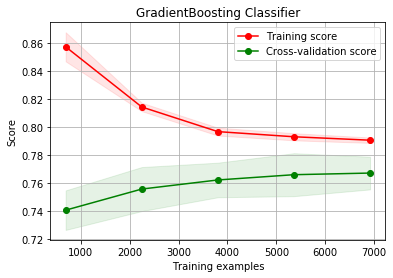

In [63]:
plot_learning_curve(GB,"GradientBoosting Classifier",X,Y,cv=kfold)

# XGBoost Classifier

In [64]:

import xgboost as xgb
def test(gamma, learning_rate, n_estimators, max_depth, subsample, X, y):
 
    estimator = xgb.XGBClassifier(gamma = gamma,
                                           learning_rate=learning_rate,
                                           n_estimators = n_estimators,
                                           max_depth = max_depth,
                                           subsample = subsample,
                                           random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_testXGB(X,y):
    def test_cv(gamma, learning_rate, n_estimators, max_depth, subsample):
       
        return test(gamma = int(gamma),
                    learning_rate = float(learning_rate),
                    n_estimators = int(n_estimators),
                    max_depth = int(max_depth),
                subsample = float(subsample),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={"gamma":(1,15),
                 "learning_rate": (0.01, 1),
                 "n_estimators": (10,1000),
            "max_depth": (1, 20),
                 "subsample" :(0.4,1.0)
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)



In [65]:
optimize_testXGB(X_train,y_train)

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.7446   |  3.681    |  0.6259   |  9.317    |  787.5    |  0.868    |
|  2        |  0.7548   |  4.816    |  0.2837   |  16.24    |  958.6    |  0.9256   |
|  3        |  0.7446   |  6.009    |  0.506    |  13.99    |  715.6    |  0.6222   |
|  4        |  0.7584   |  8.857    |  0.5081   |  1.262    |  775.1    |  0.9296   |
|  5        |  0.7607   |  6.108    |  0.6192   |  2.432    |  375.1    |  0.9599   |
|  6        |  0.7678   |  14.77    |  0.6696   |  5.607    |  10.98    |  0.7188   |
|  7        |  0.7643   |  14.86    |  0.8055   |  1.47     |  998.9    |  0.6777   |
|  8        |  0.758    |  14.98    |  0.7555   |  1.526    |  176.7    |  0.706    |
|  9        |  0.7576   |  14.72    |  0.4626   |  1.037    |  526.7    |  0.4158   |
|  10       |  0.7584   |  1.29     |  0.7211   |  1.6

In [66]:
#Train the model with the best parameters found using Bayes Optimization

XBC = xgb.XGBClassifier(gamma= int(14.95999963608344), 
                        learning_rate= float(0.2590944910174349), 
                        max_depth= int(18.952903962401006), 
                        n_estimators= int(902.2205445589307), 
                        subsample= float(0.5119358047090116))



#Fit the grid search to the train data 
XBC.fit(X_train, y_train)
cross_val(XBC, X,Y)

[-0.7698309492847855, -0.7774886141834743, -0.7716330513988289, -0.7813923227065712, -0.7838541666666666]
-0.7768398208480652


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

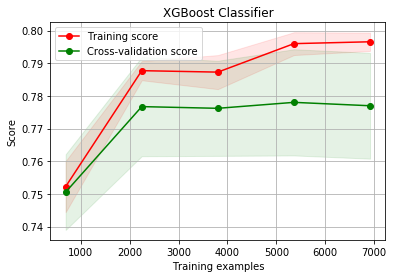

In [67]:
plot_learning_curve(XBC,"XGBoost Classifier",X,Y,cv=kfold)

# CatBoost Classifier

In [173]:
from catboost import CatBoostClassifier
def test( learning_rate, n_estimators, max_depth, X, y):
 
    estimator = CatBoostClassifier(learning_rate=learning_rate,
                                           n_estimators = n_estimators,
                                           max_depth = max_depth,
                                           random_state = 42)
    cval = cross_val_score(estimator, X_test, y_test,
                           scoring='accuracy', cv=5)
    return cval.mean()





def optimize_testCBC(X,y):
    def test_cv(learning_rate, n_estimators, max_depth):
       
        return test(
                    learning_rate = float(learning_rate),
                    n_estimators = int(n_estimators),
                    max_depth = int(max_depth),
            X=X_train,
            y=y_train,
        )

    optimizer = BayesianOptimization(
        f=test_cv,
        pbounds={
                 "learning_rate": (0.1, 1),
                 "n_estimators": (100,300),
            "max_depth": (4, 8),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    


In [174]:
optimize_testCBC(X_train,y_train)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
0:	learn: 0.5839672	total: 19.8ms	remaining: 3.68s
1:	learn: 0.5393744	total: 43.2ms	remaining: 4s
2:	learn: 0.5089050	total: 61.2ms	remaining: 3.75s
3:	learn: 0.4901027	total: 79.1ms	remaining: 3.62s
4:	learn: 0.4783188	total: 95.5ms	remaining: 3.48s
5:	learn: 0.4567954	total: 113ms	remaining: 3.42s
6:	learn: 0.4471910	total: 132ms	remaining: 3.38s
7:	learn: 0.4411568	total: 149ms	remaining: 3.33s
8:	learn: 0.4355303	total: 167ms	remaining: 3.3s
9:	learn: 0.4262634	total: 184ms	remaining: 3.25s
10:	learn: 0.4229498	total: 204ms	remaining: 3.26s
11:	learn: 0.4160175	total: 219ms	remaining: 3.19s
12:	learn: 0.4123717	total: 231ms	remaining: 3.09s
13:	learn: 0.4061942	total: 243ms	remaining: 3s
14:	learn: 0.4028775	total: 254ms	remaining: 2.91s
15:	learn: 0.3995856	total: 264ms	remaining: 2.82s
16:	learn: 0.3962699	total: 275ms	remaining: 2.75s
17:	learn: 0.3924608	

168:	learn: 0.1549835	total: 2.35s	remaining: 250ms
169:	learn: 0.1543601	total: 2.37s	remaining: 237ms
170:	learn: 0.1537941	total: 2.39s	remaining: 223ms
171:	learn: 0.1527923	total: 2.41s	remaining: 210ms
172:	learn: 0.1522464	total: 2.43s	remaining: 197ms
173:	learn: 0.1510817	total: 2.44s	remaining: 183ms
174:	learn: 0.1505365	total: 2.46s	remaining: 169ms
175:	learn: 0.1498126	total: 2.47s	remaining: 154ms
176:	learn: 0.1486209	total: 2.48s	remaining: 140ms
177:	learn: 0.1478494	total: 2.49s	remaining: 126ms
178:	learn: 0.1471060	total: 2.5s	remaining: 112ms
179:	learn: 0.1466403	total: 2.51s	remaining: 97.7ms
180:	learn: 0.1462318	total: 2.52s	remaining: 83.6ms
181:	learn: 0.1457612	total: 2.53s	remaining: 69.6ms
182:	learn: 0.1449481	total: 2.55s	remaining: 55.7ms
183:	learn: 0.1439889	total: 2.56s	remaining: 41.8ms
184:	learn: 0.1432229	total: 2.58s	remaining: 27.9ms
185:	learn: 0.1424754	total: 2.59s	remaining: 13.9ms
186:	learn: 0.1417296	total: 2.6s	remaining: 0us
0:	learn:

156:	learn: 0.1552431	total: 1.92s	remaining: 367ms
157:	learn: 0.1542001	total: 1.94s	remaining: 355ms
158:	learn: 0.1532207	total: 1.95s	remaining: 343ms
159:	learn: 0.1523730	total: 1.96s	remaining: 331ms
160:	learn: 0.1518130	total: 1.97s	remaining: 318ms
161:	learn: 0.1512317	total: 1.98s	remaining: 306ms
162:	learn: 0.1505300	total: 1.99s	remaining: 294ms
163:	learn: 0.1496641	total: 2s	remaining: 281ms
164:	learn: 0.1490446	total: 2.02s	remaining: 269ms
165:	learn: 0.1481167	total: 2.03s	remaining: 257ms
166:	learn: 0.1470797	total: 2.04s	remaining: 244ms
167:	learn: 0.1461360	total: 2.05s	remaining: 232ms
168:	learn: 0.1457736	total: 2.06s	remaining: 220ms
169:	learn: 0.1454468	total: 2.07s	remaining: 207ms
170:	learn: 0.1446219	total: 2.08s	remaining: 195ms
171:	learn: 0.1438064	total: 2.1s	remaining: 183ms
172:	learn: 0.1421048	total: 2.11s	remaining: 171ms
173:	learn: 0.1410596	total: 2.12s	remaining: 159ms
174:	learn: 0.1397267	total: 2.14s	remaining: 147ms
175:	learn: 0.13

139:	learn: 0.1748244	total: 1.65s	remaining: 554ms
140:	learn: 0.1742269	total: 1.67s	remaining: 543ms
141:	learn: 0.1735863	total: 1.68s	remaining: 531ms
142:	learn: 0.1724424	total: 1.69s	remaining: 519ms
143:	learn: 0.1716317	total: 1.7s	remaining: 507ms
144:	learn: 0.1703818	total: 1.71s	remaining: 495ms
145:	learn: 0.1693638	total: 1.72s	remaining: 483ms
146:	learn: 0.1687126	total: 1.73s	remaining: 470ms
147:	learn: 0.1681315	total: 1.74s	remaining: 459ms
148:	learn: 0.1671851	total: 1.75s	remaining: 447ms
149:	learn: 0.1668440	total: 1.76s	remaining: 435ms
150:	learn: 0.1660602	total: 1.77s	remaining: 423ms
151:	learn: 0.1653253	total: 1.78s	remaining: 410ms
152:	learn: 0.1649974	total: 1.79s	remaining: 398ms
153:	learn: 0.1642913	total: 1.8s	remaining: 386ms
154:	learn: 0.1628387	total: 1.81s	remaining: 374ms
155:	learn: 0.1621882	total: 1.82s	remaining: 362ms
156:	learn: 0.1611747	total: 1.83s	remaining: 350ms
157:	learn: 0.1599088	total: 1.84s	remaining: 338ms
158:	learn: 0.

113:	learn: 0.2121949	total: 1.51s	remaining: 966ms
114:	learn: 0.2110540	total: 1.52s	remaining: 954ms
115:	learn: 0.2096301	total: 1.54s	remaining: 942ms
116:	learn: 0.2089002	total: 1.55s	remaining: 929ms
117:	learn: 0.2079821	total: 1.57s	remaining: 917ms
118:	learn: 0.2072717	total: 1.58s	remaining: 904ms
119:	learn: 0.2065974	total: 1.6s	remaining: 891ms
120:	learn: 0.2058045	total: 1.61s	remaining: 879ms
121:	learn: 0.2048548	total: 1.63s	remaining: 867ms
122:	learn: 0.2038055	total: 1.64s	remaining: 855ms
123:	learn: 0.2025744	total: 1.66s	remaining: 842ms
124:	learn: 0.2012091	total: 1.67s	remaining: 830ms
125:	learn: 0.2003884	total: 1.69s	remaining: 818ms
126:	learn: 0.1993425	total: 1.7s	remaining: 805ms
127:	learn: 0.1985221	total: 1.72s	remaining: 792ms
128:	learn: 0.1972437	total: 1.73s	remaining: 780ms
129:	learn: 0.1964662	total: 1.75s	remaining: 767ms
130:	learn: 0.1951592	total: 1.76s	remaining: 755ms
131:	learn: 0.1941539	total: 1.78s	remaining: 742ms
132:	learn: 0.

87:	learn: 0.2307385	total: 1.04s	remaining: 1.17s
88:	learn: 0.2293865	total: 1.05s	remaining: 1.16s
89:	learn: 0.2281549	total: 1.07s	remaining: 1.15s
90:	learn: 0.2270000	total: 1.08s	remaining: 1.14s
91:	learn: 0.2260069	total: 1.09s	remaining: 1.13s
92:	learn: 0.2248301	total: 1.1s	remaining: 1.11s
93:	learn: 0.2239930	total: 1.11s	remaining: 1.1s
94:	learn: 0.2225449	total: 1.13s	remaining: 1.09s
95:	learn: 0.2207967	total: 1.14s	remaining: 1.08s
96:	learn: 0.2190950	total: 1.15s	remaining: 1.07s
97:	learn: 0.2178922	total: 1.16s	remaining: 1.05s
98:	learn: 0.2164456	total: 1.23s	remaining: 1.09s
99:	learn: 0.2145079	total: 1.26s	remaining: 1.09s
100:	learn: 0.2135681	total: 1.28s	remaining: 1.09s
101:	learn: 0.2128299	total: 1.31s	remaining: 1.09s
102:	learn: 0.2113538	total: 1.36s	remaining: 1.1s
103:	learn: 0.2096690	total: 1.38s	remaining: 1.1s
104:	learn: 0.2083461	total: 1.4s	remaining: 1.09s
105:	learn: 0.2076447	total: 1.41s	remaining: 1.08s
106:	learn: 0.2065734	total: 1

58:	learn: 0.1063136	total: 781ms	remaining: 1.26s
59:	learn: 0.1036390	total: 798ms	remaining: 1.25s
60:	learn: 0.1016363	total: 811ms	remaining: 1.24s
61:	learn: 0.0980549	total: 823ms	remaining: 1.22s
62:	learn: 0.0960437	total: 835ms	remaining: 1.21s
63:	learn: 0.0941966	total: 847ms	remaining: 1.19s
64:	learn: 0.0925508	total: 858ms	remaining: 1.18s
65:	learn: 0.0913926	total: 870ms	remaining: 1.16s
66:	learn: 0.0904514	total: 882ms	remaining: 1.15s
67:	learn: 0.0893661	total: 894ms	remaining: 1.13s
68:	learn: 0.0873573	total: 906ms	remaining: 1.12s
69:	learn: 0.0864136	total: 918ms	remaining: 1.1s
70:	learn: 0.0849324	total: 929ms	remaining: 1.09s
71:	learn: 0.0834581	total: 941ms	remaining: 1.07s
72:	learn: 0.0824223	total: 954ms	remaining: 1.06s
73:	learn: 0.0805547	total: 966ms	remaining: 1.04s
74:	learn: 0.0793339	total: 978ms	remaining: 1.03s
75:	learn: 0.0775110	total: 995ms	remaining: 1.02s
76:	learn: 0.0761424	total: 1.01s	remaining: 1.01s
77:	learn: 0.0743256	total: 1.02

72:	learn: 0.0745861	total: 1.04s	remaining: 1.16s
73:	learn: 0.0737197	total: 1.06s	remaining: 1.15s
74:	learn: 0.0729340	total: 1.08s	remaining: 1.14s
75:	learn: 0.0713168	total: 1.09s	remaining: 1.12s
76:	learn: 0.0702080	total: 1.1s	remaining: 1.1s
77:	learn: 0.0694913	total: 1.12s	remaining: 1.09s
78:	learn: 0.0678879	total: 1.13s	remaining: 1.07s
79:	learn: 0.0661580	total: 1.14s	remaining: 1.06s
80:	learn: 0.0653956	total: 1.16s	remaining: 1.04s
81:	learn: 0.0646452	total: 1.17s	remaining: 1.03s
82:	learn: 0.0635867	total: 1.18s	remaining: 1.01s
83:	learn: 0.0625209	total: 1.2s	remaining: 996ms
84:	learn: 0.0606185	total: 1.21s	remaining: 981ms
85:	learn: 0.0594441	total: 1.22s	remaining: 967ms
86:	learn: 0.0586463	total: 1.24s	remaining: 952ms
87:	learn: 0.0578940	total: 1.25s	remaining: 938ms
88:	learn: 0.0568810	total: 1.27s	remaining: 926ms
89:	learn: 0.0563923	total: 1.28s	remaining: 911ms
90:	learn: 0.0554821	total: 1.29s	remaining: 896ms
91:	learn: 0.0546437	total: 1.31s	

82:	learn: 0.0666343	total: 1.1s	remaining: 945ms
83:	learn: 0.0652347	total: 1.12s	remaining: 935ms
84:	learn: 0.0641405	total: 1.13s	remaining: 921ms
85:	learn: 0.0634926	total: 1.15s	remaining: 906ms
86:	learn: 0.0625323	total: 1.16s	remaining: 892ms
87:	learn: 0.0618450	total: 1.17s	remaining: 878ms
88:	learn: 0.0608316	total: 1.18s	remaining: 864ms
89:	learn: 0.0599606	total: 1.2s	remaining: 850ms
90:	learn: 0.0591677	total: 1.21s	remaining: 836ms
91:	learn: 0.0586235	total: 1.22s	remaining: 822ms
92:	learn: 0.0574970	total: 1.23s	remaining: 808ms
93:	learn: 0.0565335	total: 1.25s	remaining: 795ms
94:	learn: 0.0558446	total: 1.26s	remaining: 781ms
95:	learn: 0.0549113	total: 1.27s	remaining: 767ms
96:	learn: 0.0543424	total: 1.28s	remaining: 753ms
97:	learn: 0.0537209	total: 1.29s	remaining: 739ms
98:	learn: 0.0531325	total: 1.31s	remaining: 726ms
99:	learn: 0.0521726	total: 1.32s	remaining: 715ms
100:	learn: 0.0514055	total: 1.34s	remaining: 702ms
101:	learn: 0.0507732	total: 1.3

88:	learn: 0.0618732	total: 1.27s	remaining: 927ms
89:	learn: 0.0606811	total: 1.29s	remaining: 917ms
90:	learn: 0.0596542	total: 1.3s	remaining: 903ms
91:	learn: 0.0586656	total: 1.32s	remaining: 888ms
92:	learn: 0.0580347	total: 1.33s	remaining: 872ms
93:	learn: 0.0572115	total: 1.34s	remaining: 857ms
94:	learn: 0.0560570	total: 1.35s	remaining: 841ms
95:	learn: 0.0550539	total: 1.37s	remaining: 826ms
96:	learn: 0.0545774	total: 1.38s	remaining: 811ms
97:	learn: 0.0535176	total: 1.39s	remaining: 796ms
98:	learn: 0.0520874	total: 1.41s	remaining: 781ms
99:	learn: 0.0516243	total: 1.42s	remaining: 766ms
100:	learn: 0.0509799	total: 1.43s	remaining: 752ms
101:	learn: 0.0502851	total: 1.44s	remaining: 737ms
102:	learn: 0.0493585	total: 1.46s	remaining: 722ms
103:	learn: 0.0487063	total: 1.47s	remaining: 708ms
104:	learn: 0.0478750	total: 1.49s	remaining: 695ms
105:	learn: 0.0471209	total: 1.5s	remaining: 681ms
106:	learn: 0.0466834	total: 1.52s	remaining: 666ms
107:	learn: 0.0460289	tota

104:	learn: 0.0552731	total: 1.53s	remaining: 713ms
105:	learn: 0.0547555	total: 1.54s	remaining: 700ms
106:	learn: 0.0543598	total: 1.56s	remaining: 685ms
107:	learn: 0.0535341	total: 1.57s	remaining: 670ms
108:	learn: 0.0529345	total: 1.58s	remaining: 655ms
109:	learn: 0.0519110	total: 1.6s	remaining: 640ms
110:	learn: 0.0514238	total: 1.61s	remaining: 625ms
111:	learn: 0.0508124	total: 1.63s	remaining: 610ms
112:	learn: 0.0502170	total: 1.64s	remaining: 595ms
113:	learn: 0.0495582	total: 1.66s	remaining: 584ms
114:	learn: 0.0490700	total: 1.68s	remaining: 570ms
115:	learn: 0.0482114	total: 1.7s	remaining: 556ms
116:	learn: 0.0473535	total: 1.71s	remaining: 542ms
117:	learn: 0.0469038	total: 1.73s	remaining: 528ms
118:	learn: 0.0462435	total: 1.75s	remaining: 514ms
119:	learn: 0.0457001	total: 1.76s	remaining: 499ms
120:	learn: 0.0449810	total: 1.78s	remaining: 484ms
121:	learn: 0.0444127	total: 1.79s	remaining: 469ms
122:	learn: 0.0436203	total: 1.8s	remaining: 454ms
123:	learn: 0.0

112:	learn: 0.1252961	total: 1.48s	remaining: 2.33s
113:	learn: 0.1241778	total: 1.49s	remaining: 2.32s
114:	learn: 0.1231130	total: 1.51s	remaining: 2.31s
115:	learn: 0.1222936	total: 1.52s	remaining: 2.3s
116:	learn: 0.1212642	total: 1.54s	remaining: 2.28s
117:	learn: 0.1196071	total: 1.55s	remaining: 2.27s
118:	learn: 0.1186534	total: 1.56s	remaining: 2.26s
119:	learn: 0.1173551	total: 1.58s	remaining: 2.25s
120:	learn: 0.1169033	total: 1.6s	remaining: 2.24s
121:	learn: 0.1160403	total: 1.61s	remaining: 2.23s
122:	learn: 0.1155403	total: 1.63s	remaining: 2.23s
123:	learn: 0.1150116	total: 1.65s	remaining: 2.22s
124:	learn: 0.1144816	total: 1.66s	remaining: 2.21s
125:	learn: 0.1134675	total: 1.68s	remaining: 2.2s
126:	learn: 0.1126205	total: 1.7s	remaining: 2.19s
127:	learn: 0.1113217	total: 1.72s	remaining: 2.19s
128:	learn: 0.1101421	total: 1.73s	remaining: 2.18s
129:	learn: 0.1092190	total: 1.75s	remaining: 2.17s
130:	learn: 0.1081558	total: 1.77s	remaining: 2.16s
131:	learn: 0.10

272:	learn: 0.0434514	total: 4.14s	remaining: 273ms
273:	learn: 0.0432184	total: 4.16s	remaining: 258ms
274:	learn: 0.0429445	total: 4.18s	remaining: 243ms
275:	learn: 0.0427762	total: 4.2s	remaining: 228ms
276:	learn: 0.0425740	total: 4.21s	remaining: 213ms
277:	learn: 0.0423040	total: 4.22s	remaining: 198ms
278:	learn: 0.0420871	total: 4.24s	remaining: 182ms
279:	learn: 0.0418327	total: 4.25s	remaining: 167ms
280:	learn: 0.0417600	total: 4.27s	remaining: 152ms
281:	learn: 0.0414648	total: 4.28s	remaining: 137ms
282:	learn: 0.0412553	total: 4.29s	remaining: 121ms
283:	learn: 0.0408235	total: 4.31s	remaining: 106ms
284:	learn: 0.0405116	total: 4.32s	remaining: 91ms
285:	learn: 0.0404026	total: 4.33s	remaining: 75.7ms
286:	learn: 0.0402001	total: 4.35s	remaining: 60.6ms
287:	learn: 0.0400641	total: 4.37s	remaining: 45.5ms
288:	learn: 0.0399021	total: 4.38s	remaining: 30.3ms
289:	learn: 0.0396470	total: 4.39s	remaining: 15.1ms
290:	learn: 0.0394072	total: 4.41s	remaining: 0us
0:	learn: 0

152:	learn: 0.0851512	total: 2.12s	remaining: 1.91s
153:	learn: 0.0848607	total: 2.14s	remaining: 1.9s
154:	learn: 0.0841814	total: 2.15s	remaining: 1.89s
155:	learn: 0.0833768	total: 2.17s	remaining: 1.88s
156:	learn: 0.0827981	total: 2.18s	remaining: 1.86s
157:	learn: 0.0825181	total: 2.19s	remaining: 1.85s
158:	learn: 0.0815313	total: 2.21s	remaining: 1.83s
159:	learn: 0.0812016	total: 2.22s	remaining: 1.82s
160:	learn: 0.0804915	total: 2.23s	remaining: 1.8s
161:	learn: 0.0799590	total: 2.25s	remaining: 1.8s
162:	learn: 0.0793112	total: 2.27s	remaining: 1.78s
163:	learn: 0.0788160	total: 2.29s	remaining: 1.77s
164:	learn: 0.0782795	total: 2.31s	remaining: 1.76s
165:	learn: 0.0777089	total: 2.32s	remaining: 1.75s
166:	learn: 0.0771331	total: 2.34s	remaining: 1.74s
167:	learn: 0.0765415	total: 2.35s	remaining: 1.72s
168:	learn: 0.0761476	total: 2.37s	remaining: 1.71s
169:	learn: 0.0747445	total: 2.38s	remaining: 1.7s
170:	learn: 0.0742421	total: 2.4s	remaining: 1.68s
171:	learn: 0.073

23:	learn: 0.2965533	total: 304ms	remaining: 3.38s
24:	learn: 0.2899432	total: 320ms	remaining: 3.4s
25:	learn: 0.2825653	total: 336ms	remaining: 3.42s
26:	learn: 0.2788352	total: 349ms	remaining: 3.41s
27:	learn: 0.2755218	total: 362ms	remaining: 3.4s
28:	learn: 0.2695604	total: 375ms	remaining: 3.39s
29:	learn: 0.2663289	total: 387ms	remaining: 3.37s
30:	learn: 0.2624169	total: 399ms	remaining: 3.35s
31:	learn: 0.2595658	total: 411ms	remaining: 3.33s
32:	learn: 0.2564045	total: 424ms	remaining: 3.31s
33:	learn: 0.2538267	total: 435ms	remaining: 3.29s
34:	learn: 0.2514449	total: 449ms	remaining: 3.29s
35:	learn: 0.2480582	total: 465ms	remaining: 3.29s
36:	learn: 0.2442143	total: 480ms	remaining: 3.3s
37:	learn: 0.2416026	total: 494ms	remaining: 3.29s
38:	learn: 0.2387063	total: 508ms	remaining: 3.28s
39:	learn: 0.2337691	total: 525ms	remaining: 3.29s
40:	learn: 0.2319718	total: 541ms	remaining: 3.3s
41:	learn: 0.2294522	total: 553ms	remaining: 3.28s
42:	learn: 0.2269388	total: 565ms	r

193:	learn: 0.0626871	total: 2.57s	remaining: 1.29s
194:	learn: 0.0623283	total: 2.59s	remaining: 1.27s
195:	learn: 0.0620673	total: 2.6s	remaining: 1.26s
196:	learn: 0.0616505	total: 2.62s	remaining: 1.25s
197:	learn: 0.0612468	total: 2.63s	remaining: 1.24s
198:	learn: 0.0609635	total: 2.64s	remaining: 1.22s
199:	learn: 0.0604323	total: 2.65s	remaining: 1.21s
200:	learn: 0.0601202	total: 2.67s	remaining: 1.19s
201:	learn: 0.0597777	total: 2.68s	remaining: 1.18s
202:	learn: 0.0594285	total: 2.69s	remaining: 1.17s
203:	learn: 0.0589216	total: 2.71s	remaining: 1.15s
204:	learn: 0.0585516	total: 2.72s	remaining: 1.14s
205:	learn: 0.0581392	total: 2.73s	remaining: 1.13s
206:	learn: 0.0577785	total: 2.74s	remaining: 1.11s
207:	learn: 0.0572272	total: 2.75s	remaining: 1.1s
208:	learn: 0.0569295	total: 2.77s	remaining: 1.08s
209:	learn: 0.0563518	total: 2.78s	remaining: 1.07s
210:	learn: 0.0560650	total: 2.8s	remaining: 1.06s
211:	learn: 0.0558202	total: 2.81s	remaining: 1.05s
212:	learn: 0.0

67:	learn: 0.1868673	total: 947ms	remaining: 3.11s
68:	learn: 0.1838602	total: 966ms	remaining: 3.11s
69:	learn: 0.1816208	total: 981ms	remaining: 3.1s
70:	learn: 0.1797188	total: 993ms	remaining: 3.08s
71:	learn: 0.1777669	total: 1s	remaining: 3.06s
72:	learn: 0.1757956	total: 1.02s	remaining: 3.04s
73:	learn: 0.1747832	total: 1.03s	remaining: 3.02s
74:	learn: 0.1730686	total: 1.04s	remaining: 3.01s
75:	learn: 0.1707250	total: 1.06s	remaining: 2.99s
76:	learn: 0.1679855	total: 1.07s	remaining: 2.97s
77:	learn: 0.1661410	total: 1.08s	remaining: 2.96s
78:	learn: 0.1645047	total: 1.09s	remaining: 2.94s
79:	learn: 0.1611938	total: 1.11s	remaining: 2.92s
80:	learn: 0.1597256	total: 1.12s	remaining: 2.9s
81:	learn: 0.1584049	total: 1.13s	remaining: 2.89s
82:	learn: 0.1575181	total: 1.15s	remaining: 2.87s
83:	learn: 0.1560437	total: 1.17s	remaining: 2.89s
84:	learn: 0.1549580	total: 1.19s	remaining: 2.88s
85:	learn: 0.1533015	total: 1.21s	remaining: 2.88s
86:	learn: 0.1522759	total: 1.22s	re

232:	learn: 0.0522588	total: 3.17s	remaining: 790ms
233:	learn: 0.0520914	total: 3.19s	remaining: 777ms
234:	learn: 0.0518230	total: 3.21s	remaining: 764ms
235:	learn: 0.0514844	total: 3.22s	remaining: 751ms
236:	learn: 0.0509846	total: 3.23s	remaining: 737ms
237:	learn: 0.0507120	total: 3.25s	remaining: 723ms
238:	learn: 0.0503571	total: 3.26s	remaining: 709ms
239:	learn: 0.0501071	total: 3.27s	remaining: 695ms
240:	learn: 0.0498152	total: 3.29s	remaining: 682ms
241:	learn: 0.0494981	total: 3.3s	remaining: 668ms
242:	learn: 0.0492357	total: 3.31s	remaining: 654ms
243:	learn: 0.0488748	total: 3.32s	remaining: 640ms
244:	learn: 0.0485788	total: 3.34s	remaining: 627ms
245:	learn: 0.0483657	total: 3.35s	remaining: 613ms
246:	learn: 0.0481092	total: 3.36s	remaining: 599ms
247:	learn: 0.0478520	total: 3.38s	remaining: 586ms
248:	learn: 0.0476217	total: 3.39s	remaining: 572ms
249:	learn: 0.0473807	total: 3.41s	remaining: 559ms
250:	learn: 0.0471313	total: 3.42s	remaining: 545ms
251:	learn: 0

105:	learn: 0.1303496	total: 1.46s	remaining: 2.55s
106:	learn: 0.1291848	total: 1.48s	remaining: 2.54s
107:	learn: 0.1282287	total: 1.49s	remaining: 2.53s
108:	learn: 0.1269240	total: 1.5s	remaining: 2.51s
109:	learn: 0.1255925	total: 1.52s	remaining: 2.5s
110:	learn: 0.1252087	total: 1.53s	remaining: 2.48s
111:	learn: 0.1238679	total: 1.54s	remaining: 2.46s
112:	learn: 0.1221300	total: 1.55s	remaining: 2.45s
113:	learn: 0.1211977	total: 1.57s	remaining: 2.43s
114:	learn: 0.1206083	total: 1.58s	remaining: 2.42s
115:	learn: 0.1199839	total: 1.59s	remaining: 2.4s
116:	learn: 0.1188036	total: 1.61s	remaining: 2.39s
117:	learn: 0.1180664	total: 1.62s	remaining: 2.37s
118:	learn: 0.1174385	total: 1.63s	remaining: 2.36s
119:	learn: 0.1159509	total: 1.64s	remaining: 2.34s
120:	learn: 0.1150372	total: 1.66s	remaining: 2.33s
121:	learn: 0.1141480	total: 1.67s	remaining: 2.32s
122:	learn: 0.1131340	total: 1.69s	remaining: 2.31s
123:	learn: 0.1121664	total: 1.71s	remaining: 2.3s
124:	learn: 0.11

269:	learn: 0.0438450	total: 3.69s	remaining: 287ms
270:	learn: 0.0436413	total: 3.71s	remaining: 274ms
271:	learn: 0.0433795	total: 3.72s	remaining: 260ms
272:	learn: 0.0431695	total: 3.74s	remaining: 246ms
273:	learn: 0.0428900	total: 3.75s	remaining: 233ms
274:	learn: 0.0426862	total: 3.76s	remaining: 219ms
275:	learn: 0.0424281	total: 3.78s	remaining: 205ms
276:	learn: 0.0421400	total: 3.79s	remaining: 192ms
277:	learn: 0.0418940	total: 3.8s	remaining: 178ms
278:	learn: 0.0415987	total: 3.82s	remaining: 164ms
279:	learn: 0.0414143	total: 3.83s	remaining: 150ms
280:	learn: 0.0411647	total: 3.84s	remaining: 137ms
281:	learn: 0.0409475	total: 3.86s	remaining: 123ms
282:	learn: 0.0408130	total: 3.87s	remaining: 109ms
283:	learn: 0.0406651	total: 3.88s	remaining: 95.7ms
284:	learn: 0.0404073	total: 3.9s	remaining: 82.1ms
285:	learn: 0.0402553	total: 3.91s	remaining: 68.4ms
286:	learn: 0.0400807	total: 3.93s	remaining: 54.8ms
287:	learn: 0.0398766	total: 3.94s	remaining: 41.1ms
288:	lear

136:	learn: 0.1051195	total: 1.48s	remaining: 682ms
137:	learn: 0.1040864	total: 1.5s	remaining: 673ms
138:	learn: 0.1030740	total: 1.51s	remaining: 664ms
139:	learn: 0.1019458	total: 1.52s	remaining: 653ms
140:	learn: 0.1007793	total: 1.53s	remaining: 642ms
141:	learn: 0.0998518	total: 1.54s	remaining: 631ms
142:	learn: 0.0991491	total: 1.55s	remaining: 620ms
143:	learn: 0.0982259	total: 1.56s	remaining: 609ms
144:	learn: 0.0973293	total: 1.57s	remaining: 598ms
145:	learn: 0.0967436	total: 1.58s	remaining: 586ms
146:	learn: 0.0958798	total: 1.59s	remaining: 575ms
147:	learn: 0.0953611	total: 1.6s	remaining: 564ms
148:	learn: 0.0945717	total: 1.61s	remaining: 553ms
149:	learn: 0.0942293	total: 1.63s	remaining: 542ms
150:	learn: 0.0934557	total: 1.64s	remaining: 531ms
151:	learn: 0.0920364	total: 1.65s	remaining: 520ms
152:	learn: 0.0911636	total: 1.66s	remaining: 509ms
153:	learn: 0.0907285	total: 1.67s	remaining: 498ms
154:	learn: 0.0898577	total: 1.68s	remaining: 487ms
155:	learn: 0.

108:	learn: 0.1261360	total: 1.3s	remaining: 1.08s
109:	learn: 0.1238606	total: 1.31s	remaining: 1.07s
110:	learn: 0.1227876	total: 1.33s	remaining: 1.06s
111:	learn: 0.1218662	total: 1.34s	remaining: 1.05s
112:	learn: 0.1209472	total: 1.35s	remaining: 1.04s
113:	learn: 0.1194832	total: 1.36s	remaining: 1.02s
114:	learn: 0.1174806	total: 1.37s	remaining: 1.01s
115:	learn: 0.1165374	total: 1.38s	remaining: 1s
116:	learn: 0.1148005	total: 1.39s	remaining: 987ms
117:	learn: 0.1140078	total: 1.4s	remaining: 974ms
118:	learn: 0.1129255	total: 1.41s	remaining: 961ms
119:	learn: 0.1117756	total: 1.42s	remaining: 948ms
120:	learn: 0.1108376	total: 1.43s	remaining: 936ms
121:	learn: 0.1104346	total: 1.44s	remaining: 923ms
122:	learn: 0.1094927	total: 1.46s	remaining: 911ms
123:	learn: 0.1087801	total: 1.47s	remaining: 898ms
124:	learn: 0.1078671	total: 1.48s	remaining: 886ms
125:	learn: 0.1068998	total: 1.49s	remaining: 873ms
126:	learn: 0.1059593	total: 1.5s	remaining: 861ms
127:	learn: 0.1052

75:	learn: 0.1709232	total: 838ms	remaining: 1.37s
76:	learn: 0.1696343	total: 853ms	remaining: 1.36s
77:	learn: 0.1675024	total: 865ms	remaining: 1.35s
78:	learn: 0.1658924	total: 876ms	remaining: 1.34s
79:	learn: 0.1644287	total: 888ms	remaining: 1.33s
80:	learn: 0.1638067	total: 898ms	remaining: 1.32s
81:	learn: 0.1613390	total: 908ms	remaining: 1.31s
82:	learn: 0.1594979	total: 918ms	remaining: 1.29s
83:	learn: 0.1577090	total: 929ms	remaining: 1.28s
84:	learn: 0.1568339	total: 939ms	remaining: 1.27s
85:	learn: 0.1549186	total: 949ms	remaining: 1.26s
86:	learn: 0.1517986	total: 959ms	remaining: 1.25s
87:	learn: 0.1502003	total: 970ms	remaining: 1.23s
88:	learn: 0.1483889	total: 980ms	remaining: 1.22s
89:	learn: 0.1468525	total: 990ms	remaining: 1.21s
90:	learn: 0.1457420	total: 1s	remaining: 1.2s
91:	learn: 0.1440464	total: 1.01s	remaining: 1.19s
92:	learn: 0.1424090	total: 1.02s	remaining: 1.18s
93:	learn: 0.1393831	total: 1.03s	remaining: 1.16s
94:	learn: 0.1383798	total: 1.05s	r

36:	learn: 0.2888636	total: 415ms	remaining: 1.83s
37:	learn: 0.2854485	total: 428ms	remaining: 1.82s
38:	learn: 0.2811863	total: 442ms	remaining: 1.82s
39:	learn: 0.2785017	total: 452ms	remaining: 1.81s
40:	learn: 0.2709608	total: 467ms	remaining: 1.81s
41:	learn: 0.2674148	total: 481ms	remaining: 1.81s
42:	learn: 0.2625597	total: 494ms	remaining: 1.8s
43:	learn: 0.2586959	total: 506ms	remaining: 1.79s
44:	learn: 0.2561675	total: 517ms	remaining: 1.78s
45:	learn: 0.2539918	total: 528ms	remaining: 1.77s
46:	learn: 0.2518678	total: 538ms	remaining: 1.75s
47:	learn: 0.2495653	total: 549ms	remaining: 1.74s
48:	learn: 0.2474291	total: 559ms	remaining: 1.72s
49:	learn: 0.2440815	total: 569ms	remaining: 1.71s
50:	learn: 0.2420261	total: 580ms	remaining: 1.69s
51:	learn: 0.2389372	total: 590ms	remaining: 1.68s
52:	learn: 0.2362135	total: 601ms	remaining: 1.67s
53:	learn: 0.2333233	total: 612ms	remaining: 1.65s
54:	learn: 0.2317078	total: 625ms	remaining: 1.65s
55:	learn: 0.2282945	total: 640m

7:	learn: 0.4186712	total: 93.5ms	remaining: 2.25s
8:	learn: 0.4144492	total: 108ms	remaining: 2.29s
9:	learn: 0.4076267	total: 122ms	remaining: 2.32s
10:	learn: 0.4017212	total: 137ms	remaining: 2.35s
11:	learn: 0.3942247	total: 148ms	remaining: 2.31s
12:	learn: 0.3808580	total: 158ms	remaining: 2.27s
13:	learn: 0.3762507	total: 168ms	remaining: 2.24s
14:	learn: 0.3678761	total: 179ms	remaining: 2.21s
15:	learn: 0.3627819	total: 189ms	remaining: 2.18s
16:	learn: 0.3580890	total: 200ms	remaining: 2.15s
17:	learn: 0.3498188	total: 210ms	remaining: 2.13s
18:	learn: 0.3451947	total: 221ms	remaining: 2.1s
19:	learn: 0.3391290	total: 232ms	remaining: 2.09s
20:	learn: 0.3351437	total: 243ms	remaining: 2.07s
21:	learn: 0.3307336	total: 253ms	remaining: 2.05s
22:	learn: 0.3271329	total: 263ms	remaining: 2.02s
23:	learn: 0.3224300	total: 273ms	remaining: 2s
24:	learn: 0.3164990	total: 284ms	remaining: 1.99s
25:	learn: 0.3112196	total: 295ms	remaining: 1.98s
26:	learn: 0.3060552	total: 310ms	rem

168:	learn: 0.0846412	total: 1.93s	remaining: 354ms
169:	learn: 0.0843111	total: 1.94s	remaining: 343ms
170:	learn: 0.0840776	total: 1.95s	remaining: 331ms
171:	learn: 0.0838112	total: 1.96s	remaining: 320ms
172:	learn: 0.0829950	total: 1.97s	remaining: 308ms
173:	learn: 0.0824213	total: 1.99s	remaining: 297ms
174:	learn: 0.0811260	total: 2s	remaining: 285ms
175:	learn: 0.0806184	total: 2.01s	remaining: 274ms
176:	learn: 0.0801614	total: 2.02s	remaining: 262ms
177:	learn: 0.0797135	total: 2.03s	remaining: 251ms
178:	learn: 0.0794743	total: 2.04s	remaining: 239ms
179:	learn: 0.0790411	total: 2.05s	remaining: 228ms
180:	learn: 0.0784368	total: 2.06s	remaining: 216ms
181:	learn: 0.0778350	total: 2.07s	remaining: 205ms
182:	learn: 0.0765292	total: 2.08s	remaining: 194ms
183:	learn: 0.0758371	total: 2.1s	remaining: 182ms
184:	learn: 0.0754111	total: 2.11s	remaining: 171ms
185:	learn: 0.0748988	total: 2.12s	remaining: 160ms
186:	learn: 0.0741763	total: 2.13s	remaining: 148ms
187:	learn: 0.07

133:	learn: 0.0768431	total: 1.63s	remaining: 486ms
134:	learn: 0.0760975	total: 1.64s	remaining: 475ms
135:	learn: 0.0755491	total: 1.66s	remaining: 463ms
136:	learn: 0.0745947	total: 1.67s	remaining: 451ms
137:	learn: 0.0740739	total: 1.68s	remaining: 438ms
138:	learn: 0.0736294	total: 1.69s	remaining: 426ms
139:	learn: 0.0726232	total: 1.7s	remaining: 414ms
140:	learn: 0.0718203	total: 1.71s	remaining: 401ms
141:	learn: 0.0710916	total: 1.72s	remaining: 389ms
142:	learn: 0.0704460	total: 1.74s	remaining: 376ms
143:	learn: 0.0695688	total: 1.75s	remaining: 364ms
144:	learn: 0.0689361	total: 1.76s	remaining: 352ms
145:	learn: 0.0680372	total: 1.77s	remaining: 339ms
146:	learn: 0.0674440	total: 1.78s	remaining: 327ms
147:	learn: 0.0669759	total: 1.79s	remaining: 315ms
148:	learn: 0.0664452	total: 1.8s	remaining: 302ms
149:	learn: 0.0659893	total: 1.81s	remaining: 290ms
150:	learn: 0.0654305	total: 1.82s	remaining: 278ms
151:	learn: 0.0645552	total: 1.83s	remaining: 266ms
152:	learn: 0.

125:	learn: 0.0677314	total: 1.55s	remaining: 592ms
126:	learn: 0.0670082	total: 1.57s	remaining: 580ms
127:	learn: 0.0664427	total: 1.58s	remaining: 568ms
128:	learn: 0.0659039	total: 1.59s	remaining: 555ms
129:	learn: 0.0652897	total: 1.6s	remaining: 541ms
130:	learn: 0.0647934	total: 1.61s	remaining: 528ms
131:	learn: 0.0641652	total: 1.62s	remaining: 515ms
132:	learn: 0.0637914	total: 1.63s	remaining: 502ms
133:	learn: 0.0629668	total: 1.64s	remaining: 490ms
134:	learn: 0.0621670	total: 1.65s	remaining: 477ms
135:	learn: 0.0615811	total: 1.66s	remaining: 465ms
136:	learn: 0.0609483	total: 1.67s	remaining: 452ms
137:	learn: 0.0599734	total: 1.69s	remaining: 440ms
138:	learn: 0.0594908	total: 1.7s	remaining: 427ms
139:	learn: 0.0590946	total: 1.71s	remaining: 415ms
140:	learn: 0.0582286	total: 1.72s	remaining: 402ms
141:	learn: 0.0579356	total: 1.73s	remaining: 390ms
142:	learn: 0.0575334	total: 1.74s	remaining: 377ms
143:	learn: 0.0571950	total: 1.75s	remaining: 365ms
144:	learn: 0.

121:	learn: 0.0680803	total: 1.44s	remaining: 615ms
122:	learn: 0.0675814	total: 1.46s	remaining: 605ms
123:	learn: 0.0664096	total: 1.47s	remaining: 592ms
124:	learn: 0.0656749	total: 1.48s	remaining: 581ms
125:	learn: 0.0652531	total: 1.49s	remaining: 569ms
126:	learn: 0.0644406	total: 1.5s	remaining: 556ms
127:	learn: 0.0636498	total: 1.51s	remaining: 544ms
128:	learn: 0.0633029	total: 1.52s	remaining: 532ms
129:	learn: 0.0628628	total: 1.53s	remaining: 520ms
130:	learn: 0.0622866	total: 1.55s	remaining: 507ms
131:	learn: 0.0615954	total: 1.56s	remaining: 495ms
132:	learn: 0.0606874	total: 1.57s	remaining: 483ms
133:	learn: 0.0601328	total: 1.58s	remaining: 471ms
134:	learn: 0.0593104	total: 1.59s	remaining: 459ms
135:	learn: 0.0590662	total: 1.6s	remaining: 447ms
136:	learn: 0.0586366	total: 1.61s	remaining: 435ms
137:	learn: 0.0578060	total: 1.62s	remaining: 423ms
138:	learn: 0.0574582	total: 1.63s	remaining: 411ms
139:	learn: 0.0570675	total: 1.65s	remaining: 400ms
140:	learn: 0.

116:	learn: 0.0823345	total: 1.46s	remaining: 709ms
117:	learn: 0.0818471	total: 1.47s	remaining: 698ms
118:	learn: 0.0811658	total: 1.48s	remaining: 686ms
119:	learn: 0.0805074	total: 1.5s	remaining: 673ms
120:	learn: 0.0800564	total: 1.51s	remaining: 660ms
121:	learn: 0.0786330	total: 1.52s	remaining: 648ms
122:	learn: 0.0775820	total: 1.53s	remaining: 635ms
123:	learn: 0.0768322	total: 1.54s	remaining: 622ms
124:	learn: 0.0756861	total: 1.56s	remaining: 612ms
125:	learn: 0.0747982	total: 1.57s	remaining: 599ms
126:	learn: 0.0741871	total: 1.58s	remaining: 586ms
127:	learn: 0.0731570	total: 1.59s	remaining: 573ms
128:	learn: 0.0727486	total: 1.61s	remaining: 561ms
129:	learn: 0.0722496	total: 1.62s	remaining: 548ms
130:	learn: 0.0715083	total: 1.63s	remaining: 535ms
131:	learn: 0.0710002	total: 1.64s	remaining: 522ms
132:	learn: 0.0699390	total: 1.65s	remaining: 510ms
133:	learn: 0.0693717	total: 1.67s	remaining: 498ms
134:	learn: 0.0688798	total: 1.68s	remaining: 486ms
135:	learn: 0

108:	learn: 0.0932691	total: 1.31s	remaining: 784ms
109:	learn: 0.0924006	total: 1.33s	remaining: 773ms
110:	learn: 0.0913770	total: 1.34s	remaining: 763ms
111:	learn: 0.0902378	total: 1.35s	remaining: 750ms
112:	learn: 0.0894811	total: 1.37s	remaining: 738ms
113:	learn: 0.0886741	total: 1.38s	remaining: 725ms
114:	learn: 0.0877008	total: 1.39s	remaining: 713ms
115:	learn: 0.0869195	total: 1.4s	remaining: 700ms
116:	learn: 0.0859992	total: 1.41s	remaining: 687ms
117:	learn: 0.0851954	total: 1.42s	remaining: 674ms
118:	learn: 0.0845193	total: 1.43s	remaining: 662ms
119:	learn: 0.0835419	total: 1.44s	remaining: 649ms
120:	learn: 0.0824513	total: 1.45s	remaining: 636ms
121:	learn: 0.0819525	total: 1.46s	remaining: 624ms
122:	learn: 0.0811372	total: 1.47s	remaining: 611ms
123:	learn: 0.0803215	total: 1.48s	remaining: 598ms
124:	learn: 0.0791323	total: 1.5s	remaining: 586ms
125:	learn: 0.0783214	total: 1.51s	remaining: 574ms
126:	learn: 0.0777402	total: 1.52s	remaining: 562ms
127:	learn: 0.

0:	learn: 0.6382746	total: 25.5ms	remaining: 2.52s
1:	learn: 0.5905975	total: 43.3ms	remaining: 2.12s
2:	learn: 0.5725893	total: 50ms	remaining: 1.62s
3:	learn: 0.5463592	total: 66.1ms	remaining: 1.59s
4:	learn: 0.5239004	total: 81ms	remaining: 1.54s
5:	learn: 0.5054790	total: 96.4ms	remaining: 1.51s
6:	learn: 0.4932100	total: 112ms	remaining: 1.49s
7:	learn: 0.4789608	total: 128ms	remaining: 1.47s
8:	learn: 0.4670476	total: 144ms	remaining: 1.45s
9:	learn: 0.4598483	total: 159ms	remaining: 1.43s
10:	learn: 0.4511458	total: 176ms	remaining: 1.42s
11:	learn: 0.4452997	total: 192ms	remaining: 1.41s
12:	learn: 0.4378515	total: 208ms	remaining: 1.39s
13:	learn: 0.4309095	total: 225ms	remaining: 1.38s
14:	learn: 0.4203867	total: 247ms	remaining: 1.4s
15:	learn: 0.4155840	total: 267ms	remaining: 1.4s
16:	learn: 0.4084816	total: 283ms	remaining: 1.38s
17:	learn: 0.4054441	total: 299ms	remaining: 1.36s
18:	learn: 0.3998196	total: 315ms	remaining: 1.34s
19:	learn: 0.3961107	total: 332ms	remaini

70:	learn: 0.2823924	total: 1.09s	remaining: 445ms
71:	learn: 0.2810831	total: 1.11s	remaining: 431ms
72:	learn: 0.2801137	total: 1.13s	remaining: 417ms
73:	learn: 0.2781868	total: 1.14s	remaining: 401ms
74:	learn: 0.2766065	total: 1.16s	remaining: 386ms
75:	learn: 0.2754953	total: 1.17s	remaining: 370ms
76:	learn: 0.2734634	total: 1.19s	remaining: 354ms
77:	learn: 0.2713855	total: 1.2s	remaining: 338ms
78:	learn: 0.2706497	total: 1.21s	remaining: 323ms
79:	learn: 0.2693025	total: 1.23s	remaining: 307ms
80:	learn: 0.2673574	total: 1.24s	remaining: 292ms
81:	learn: 0.2658250	total: 1.26s	remaining: 276ms
82:	learn: 0.2641477	total: 1.27s	remaining: 261ms
83:	learn: 0.2621768	total: 1.28s	remaining: 245ms
84:	learn: 0.2596166	total: 1.3s	remaining: 230ms
85:	learn: 0.2585165	total: 1.32s	remaining: 216ms
86:	learn: 0.2577560	total: 1.34s	remaining: 200ms
87:	learn: 0.2566164	total: 1.35s	remaining: 185ms
88:	learn: 0.2553302	total: 1.37s	remaining: 169ms
89:	learn: 0.2534141	total: 1.38s

32:	learn: 0.3599802	total: 552ms	remaining: 1.12s
33:	learn: 0.3557943	total: 571ms	remaining: 1.11s
34:	learn: 0.3538763	total: 586ms	remaining: 1.09s
35:	learn: 0.3509935	total: 601ms	remaining: 1.07s
36:	learn: 0.3489037	total: 617ms	remaining: 1.05s
37:	learn: 0.3463497	total: 633ms	remaining: 1.03s
38:	learn: 0.3442059	total: 648ms	remaining: 1.01s
39:	learn: 0.3421757	total: 665ms	remaining: 997ms
40:	learn: 0.3402357	total: 680ms	remaining: 978ms
41:	learn: 0.3383538	total: 699ms	remaining: 965ms
42:	learn: 0.3362348	total: 715ms	remaining: 948ms
43:	learn: 0.3339268	total: 731ms	remaining: 930ms
44:	learn: 0.3320045	total: 746ms	remaining: 912ms
45:	learn: 0.3300334	total: 766ms	remaining: 899ms
46:	learn: 0.3285251	total: 785ms	remaining: 885ms
47:	learn: 0.3269826	total: 801ms	remaining: 868ms
48:	learn: 0.3249264	total: 817ms	remaining: 851ms
49:	learn: 0.3218962	total: 833ms	remaining: 833ms
50:	learn: 0.3208191	total: 849ms	remaining: 815ms
51:	learn: 0.3188392	total: 864

98:	learn: 0.2857140	total: 1.25s	remaining: 1.86s
99:	learn: 0.2839936	total: 1.27s	remaining: 1.85s
100:	learn: 0.2828766	total: 1.28s	remaining: 1.84s
101:	learn: 0.2819511	total: 1.29s	remaining: 1.82s
102:	learn: 0.2805549	total: 1.3s	remaining: 1.81s
103:	learn: 0.2797305	total: 1.31s	remaining: 1.79s
104:	learn: 0.2785702	total: 1.32s	remaining: 1.78s
105:	learn: 0.2776104	total: 1.34s	remaining: 1.76s
106:	learn: 0.2763905	total: 1.35s	remaining: 1.75s
107:	learn: 0.2755441	total: 1.36s	remaining: 1.74s
108:	learn: 0.2740311	total: 1.37s	remaining: 1.72s
109:	learn: 0.2730414	total: 1.38s	remaining: 1.71s
110:	learn: 0.2721523	total: 1.4s	remaining: 1.7s
111:	learn: 0.2711632	total: 1.41s	remaining: 1.68s
112:	learn: 0.2696882	total: 1.42s	remaining: 1.67s
113:	learn: 0.2683864	total: 1.43s	remaining: 1.66s
114:	learn: 0.2674667	total: 1.44s	remaining: 1.64s
115:	learn: 0.2665266	total: 1.46s	remaining: 1.63s
116:	learn: 0.2653197	total: 1.47s	remaining: 1.63s
117:	learn: 0.264

17:	learn: 0.4194619	total: 215ms	remaining: 2.73s
18:	learn: 0.4157538	total: 230ms	remaining: 2.75s
19:	learn: 0.4133278	total: 247ms	remaining: 2.79s
20:	learn: 0.4079361	total: 259ms	remaining: 2.77s
21:	learn: 0.4057556	total: 271ms	remaining: 2.75s
22:	learn: 0.4032580	total: 283ms	remaining: 2.74s
23:	learn: 0.3995952	total: 294ms	remaining: 2.72s
24:	learn: 0.3950530	total: 306ms	remaining: 2.71s
25:	learn: 0.3915902	total: 318ms	remaining: 2.69s
26:	learn: 0.3899020	total: 331ms	remaining: 2.68s
27:	learn: 0.3876760	total: 343ms	remaining: 2.67s
28:	learn: 0.3851827	total: 354ms	remaining: 2.65s
29:	learn: 0.3816426	total: 366ms	remaining: 2.64s
30:	learn: 0.3786090	total: 378ms	remaining: 2.62s
31:	learn: 0.3767130	total: 391ms	remaining: 2.61s
32:	learn: 0.3742985	total: 402ms	remaining: 2.6s
33:	learn: 0.3720922	total: 415ms	remaining: 2.58s
34:	learn: 0.3688357	total: 430ms	remaining: 2.59s
35:	learn: 0.3678697	total: 447ms	remaining: 2.6s
36:	learn: 0.3664230	total: 463ms

187:	learn: 0.1947695	total: 2.5s	remaining: 771ms
188:	learn: 0.1937018	total: 2.51s	remaining: 758ms
189:	learn: 0.1930706	total: 2.53s	remaining: 746ms
190:	learn: 0.1925186	total: 2.54s	remaining: 733ms
191:	learn: 0.1916216	total: 2.56s	remaining: 719ms
192:	learn: 0.1908953	total: 2.57s	remaining: 705ms
193:	learn: 0.1902442	total: 2.58s	remaining: 692ms
194:	learn: 0.1895717	total: 2.59s	remaining: 678ms
195:	learn: 0.1892318	total: 2.6s	remaining: 664ms
196:	learn: 0.1886889	total: 2.62s	remaining: 651ms
197:	learn: 0.1881280	total: 2.63s	remaining: 637ms
198:	learn: 0.1870062	total: 2.64s	remaining: 623ms
199:	learn: 0.1865011	total: 2.65s	remaining: 610ms
200:	learn: 0.1857910	total: 2.66s	remaining: 596ms
201:	learn: 0.1854132	total: 2.67s	remaining: 583ms
202:	learn: 0.1845943	total: 2.69s	remaining: 569ms
203:	learn: 0.1840257	total: 2.7s	remaining: 556ms
204:	learn: 0.1827315	total: 2.72s	remaining: 543ms
205:	learn: 0.1820306	total: 2.73s	remaining: 530ms
206:	learn: 0.1

113:	learn: 0.2531098	total: 1.47s	remaining: 1.7s
114:	learn: 0.2520653	total: 1.48s	remaining: 1.69s
115:	learn: 0.2502404	total: 1.5s	remaining: 1.68s
116:	learn: 0.2490027	total: 1.51s	remaining: 1.66s
117:	learn: 0.2483177	total: 1.52s	remaining: 1.65s
118:	learn: 0.2478187	total: 1.53s	remaining: 1.64s
119:	learn: 0.2466973	total: 1.54s	remaining: 1.62s
120:	learn: 0.2456026	total: 1.56s	remaining: 1.61s
121:	learn: 0.2440627	total: 1.57s	remaining: 1.6s
122:	learn: 0.2433378	total: 1.59s	remaining: 1.59s
123:	learn: 0.2421632	total: 1.6s	remaining: 1.57s
124:	learn: 0.2415487	total: 1.61s	remaining: 1.56s
125:	learn: 0.2400425	total: 1.62s	remaining: 1.54s
126:	learn: 0.2392896	total: 1.63s	remaining: 1.53s
127:	learn: 0.2382526	total: 1.64s	remaining: 1.51s
128:	learn: 0.2365426	total: 1.66s	remaining: 1.5s
129:	learn: 0.2353034	total: 1.67s	remaining: 1.49s
130:	learn: 0.2347305	total: 1.68s	remaining: 1.48s
131:	learn: 0.2338725	total: 1.7s	remaining: 1.47s
132:	learn: 0.2329

41:	learn: 0.3660755	total: 552ms	remaining: 2.68s
42:	learn: 0.3634922	total: 571ms	remaining: 2.69s
43:	learn: 0.3622311	total: 589ms	remaining: 2.7s
44:	learn: 0.3600011	total: 607ms	remaining: 2.71s
45:	learn: 0.3589911	total: 624ms	remaining: 2.71s
46:	learn: 0.3567782	total: 636ms	remaining: 2.69s
47:	learn: 0.3560143	total: 648ms	remaining: 2.67s
48:	learn: 0.3551170	total: 657ms	remaining: 2.64s
49:	learn: 0.3543512	total: 669ms	remaining: 2.62s
50:	learn: 0.3521658	total: 682ms	remaining: 2.61s
51:	learn: 0.3503133	total: 696ms	remaining: 2.6s
52:	learn: 0.3489135	total: 708ms	remaining: 2.58s
53:	learn: 0.3479097	total: 720ms	remaining: 2.56s
54:	learn: 0.3450983	total: 732ms	remaining: 2.54s
55:	learn: 0.3440783	total: 745ms	remaining: 2.53s
56:	learn: 0.3423022	total: 761ms	remaining: 2.52s
57:	learn: 0.3410481	total: 777ms	remaining: 2.52s
58:	learn: 0.3393575	total: 791ms	remaining: 2.5s
59:	learn: 0.3373858	total: 804ms	remaining: 2.49s
60:	learn: 0.3358451	total: 817ms	

208:	learn: 0.1888467	total: 2.82s	remaining: 499ms
209:	learn: 0.1883535	total: 2.83s	remaining: 486ms
210:	learn: 0.1879431	total: 2.85s	remaining: 473ms
211:	learn: 0.1873659	total: 2.86s	remaining: 459ms
212:	learn: 0.1863666	total: 2.88s	remaining: 445ms
213:	learn: 0.1856731	total: 2.89s	remaining: 432ms
214:	learn: 0.1851491	total: 2.9s	remaining: 418ms
215:	learn: 0.1843748	total: 2.91s	remaining: 404ms
216:	learn: 0.1837766	total: 2.92s	remaining: 391ms
217:	learn: 0.1832673	total: 2.94s	remaining: 377ms
218:	learn: 0.1828388	total: 2.95s	remaining: 364ms
219:	learn: 0.1822675	total: 2.96s	remaining: 350ms
220:	learn: 0.1816243	total: 2.97s	remaining: 336ms
221:	learn: 0.1810813	total: 2.98s	remaining: 323ms
222:	learn: 0.1806031	total: 3s	remaining: 309ms
223:	learn: 0.1801201	total: 3.01s	remaining: 296ms
224:	learn: 0.1797838	total: 3.03s	remaining: 283ms
225:	learn: 0.1793150	total: 3.04s	remaining: 269ms
226:	learn: 0.1789093	total: 3.06s	remaining: 256ms
227:	learn: 0.17

136:	learn: 0.2431583	total: 1.72s	remaining: 1.37s
137:	learn: 0.2425706	total: 1.74s	remaining: 1.36s
138:	learn: 0.2416244	total: 1.75s	remaining: 1.35s
139:	learn: 0.2407153	total: 1.76s	remaining: 1.33s
140:	learn: 0.2395913	total: 1.77s	remaining: 1.32s
141:	learn: 0.2384151	total: 1.79s	remaining: 1.31s
142:	learn: 0.2372965	total: 1.8s	remaining: 1.3s
143:	learn: 0.2363793	total: 1.81s	remaining: 1.28s
144:	learn: 0.2351660	total: 1.82s	remaining: 1.27s
145:	learn: 0.2345939	total: 1.84s	remaining: 1.26s
146:	learn: 0.2338352	total: 1.85s	remaining: 1.25s
147:	learn: 0.2332134	total: 1.86s	remaining: 1.23s
148:	learn: 0.2326860	total: 1.88s	remaining: 1.22s
149:	learn: 0.2320705	total: 1.89s	remaining: 1.21s
150:	learn: 0.2314117	total: 1.9s	remaining: 1.19s
151:	learn: 0.2304977	total: 1.91s	remaining: 1.18s
152:	learn: 0.2298002	total: 1.93s	remaining: 1.17s
153:	learn: 0.2289748	total: 1.94s	remaining: 1.16s
154:	learn: 0.2282871	total: 1.96s	remaining: 1.15s
155:	learn: 0.2

63:	learn: 0.4185416	total: 607ms	remaining: 341ms
64:	learn: 0.4177477	total: 619ms	remaining: 334ms
65:	learn: 0.4172847	total: 631ms	remaining: 325ms
66:	learn: 0.4168046	total: 641ms	remaining: 316ms
67:	learn: 0.4161719	total: 650ms	remaining: 306ms
68:	learn: 0.4156563	total: 659ms	remaining: 296ms
69:	learn: 0.4152138	total: 668ms	remaining: 286ms
70:	learn: 0.4143351	total: 677ms	remaining: 277ms
71:	learn: 0.4136268	total: 686ms	remaining: 267ms
72:	learn: 0.4130563	total: 695ms	remaining: 257ms
73:	learn: 0.4121667	total: 704ms	remaining: 247ms
74:	learn: 0.4110129	total: 713ms	remaining: 238ms
75:	learn: 0.4088216	total: 721ms	remaining: 228ms
76:	learn: 0.4083974	total: 731ms	remaining: 218ms
77:	learn: 0.4076882	total: 740ms	remaining: 209ms
78:	learn: 0.4072442	total: 749ms	remaining: 199ms
79:	learn: 0.4068264	total: 759ms	remaining: 190ms
80:	learn: 0.4061145	total: 768ms	remaining: 180ms
81:	learn: 0.4052842	total: 775ms	remaining: 170ms
82:	learn: 0.4044836	total: 785

45:	learn: 0.4200398	total: 424ms	remaining: 497ms
46:	learn: 0.4192673	total: 436ms	remaining: 492ms
47:	learn: 0.4185891	total: 449ms	remaining: 486ms
48:	learn: 0.4180336	total: 461ms	remaining: 480ms
49:	learn: 0.4170640	total: 475ms	remaining: 475ms
50:	learn: 0.4161527	total: 487ms	remaining: 468ms
51:	learn: 0.4154169	total: 499ms	remaining: 460ms
52:	learn: 0.4141986	total: 509ms	remaining: 451ms
53:	learn: 0.4136579	total: 518ms	remaining: 441ms
54:	learn: 0.4125222	total: 527ms	remaining: 431ms
55:	learn: 0.4117433	total: 536ms	remaining: 421ms
56:	learn: 0.4112556	total: 545ms	remaining: 411ms
57:	learn: 0.4108239	total: 553ms	remaining: 401ms
58:	learn: 0.4094134	total: 561ms	remaining: 390ms
59:	learn: 0.4088129	total: 570ms	remaining: 380ms
60:	learn: 0.4082685	total: 579ms	remaining: 370ms
61:	learn: 0.4057997	total: 587ms	remaining: 360ms
62:	learn: 0.4047206	total: 596ms	remaining: 350ms
63:	learn: 0.4039447	total: 605ms	remaining: 341ms
64:	learn: 0.4029199	total: 613

24:	learn: 0.4580477	total: 245ms	remaining: 734ms
25:	learn: 0.4565457	total: 257ms	remaining: 732ms
26:	learn: 0.4549503	total: 269ms	remaining: 727ms
27:	learn: 0.4523755	total: 279ms	remaining: 716ms
28:	learn: 0.4501597	total: 287ms	remaining: 703ms
29:	learn: 0.4489315	total: 296ms	remaining: 691ms
30:	learn: 0.4480408	total: 305ms	remaining: 678ms
31:	learn: 0.4469770	total: 313ms	remaining: 666ms
32:	learn: 0.4456301	total: 322ms	remaining: 653ms
33:	learn: 0.4432223	total: 330ms	remaining: 642ms
34:	learn: 0.4421302	total: 340ms	remaining: 631ms
35:	learn: 0.4383579	total: 348ms	remaining: 619ms
36:	learn: 0.4375940	total: 357ms	remaining: 608ms
37:	learn: 0.4360365	total: 366ms	remaining: 596ms
38:	learn: 0.4350418	total: 375ms	remaining: 587ms
39:	learn: 0.4336359	total: 384ms	remaining: 577ms
40:	learn: 0.4328615	total: 393ms	remaining: 565ms
41:	learn: 0.4317334	total: 402ms	remaining: 555ms
42:	learn: 0.4311594	total: 410ms	remaining: 544ms
43:	learn: 0.4302196	total: 419

87:	learn: 0.4117746	total: 823ms	remaining: 234ms
88:	learn: 0.4109339	total: 835ms	remaining: 225ms
89:	learn: 0.4101956	total: 847ms	remaining: 217ms
90:	learn: 0.4094871	total: 857ms	remaining: 207ms
91:	learn: 0.4088775	total: 867ms	remaining: 198ms
92:	learn: 0.4082615	total: 875ms	remaining: 188ms
93:	learn: 0.4073805	total: 884ms	remaining: 179ms
94:	learn: 0.4067045	total: 893ms	remaining: 169ms
95:	learn: 0.4054754	total: 901ms	remaining: 160ms
96:	learn: 0.4037214	total: 909ms	remaining: 150ms
97:	learn: 0.4032351	total: 918ms	remaining: 140ms
98:	learn: 0.4026728	total: 926ms	remaining: 131ms
99:	learn: 0.4018578	total: 936ms	remaining: 122ms
100:	learn: 0.4013000	total: 944ms	remaining: 112ms
101:	learn: 0.4009959	total: 954ms	remaining: 103ms
102:	learn: 0.4004439	total: 962ms	remaining: 93.4ms
103:	learn: 0.4001304	total: 971ms	remaining: 84ms
104:	learn: 0.3995151	total: 980ms	remaining: 74.7ms
105:	learn: 0.3992674	total: 988ms	remaining: 65.3ms
106:	learn: 0.3988980	t

25:	learn: 0.4490159	total: 237ms	remaining: 793ms
26:	learn: 0.4470391	total: 246ms	remaining: 784ms
27:	learn: 0.4443581	total: 254ms	remaining: 773ms
28:	learn: 0.4427502	total: 266ms	remaining: 771ms
29:	learn: 0.4415229	total: 278ms	remaining: 769ms
30:	learn: 0.4400900	total: 286ms	remaining: 757ms
31:	learn: 0.4396348	total: 296ms	remaining: 749ms
32:	learn: 0.4368855	total: 306ms	remaining: 741ms
33:	learn: 0.4348503	total: 314ms	remaining: 730ms
34:	learn: 0.4335148	total: 323ms	remaining: 719ms
35:	learn: 0.4316031	total: 332ms	remaining: 710ms
36:	learn: 0.4308767	total: 341ms	remaining: 700ms
37:	learn: 0.4289424	total: 349ms	remaining: 689ms
38:	learn: 0.4281684	total: 358ms	remaining: 680ms
39:	learn: 0.4274843	total: 367ms	remaining: 670ms
40:	learn: 0.4269350	total: 376ms	remaining: 661ms
41:	learn: 0.4264031	total: 385ms	remaining: 652ms
42:	learn: 0.4249125	total: 394ms	remaining: 641ms
43:	learn: 0.4243396	total: 402ms	remaining: 631ms
44:	learn: 0.4232787	total: 411

80:	learn: 0.4185025	total: 755ms	remaining: 298ms
81:	learn: 0.4176210	total: 766ms	remaining: 290ms
82:	learn: 0.4167097	total: 779ms	remaining: 281ms
83:	learn: 0.4160518	total: 788ms	remaining: 272ms
84:	learn: 0.4154739	total: 798ms	remaining: 263ms
85:	learn: 0.4146968	total: 806ms	remaining: 253ms
86:	learn: 0.4142740	total: 815ms	remaining: 244ms
87:	learn: 0.4134477	total: 824ms	remaining: 234ms
88:	learn: 0.4125817	total: 833ms	remaining: 225ms
89:	learn: 0.4112408	total: 843ms	remaining: 215ms
90:	learn: 0.4102786	total: 851ms	remaining: 206ms
91:	learn: 0.4096201	total: 861ms	remaining: 196ms
92:	learn: 0.4089959	total: 869ms	remaining: 187ms
93:	learn: 0.4087697	total: 877ms	remaining: 177ms
94:	learn: 0.4082866	total: 887ms	remaining: 168ms
95:	learn: 0.4074610	total: 896ms	remaining: 159ms
96:	learn: 0.4069667	total: 904ms	remaining: 149ms
97:	learn: 0.4065868	total: 911ms	remaining: 139ms
98:	learn: 0.4062566	total: 919ms	remaining: 130ms
99:	learn: 0.4055323	total: 928

19:	learn: 0.4759360	total: 212ms	remaining: 2.62s
20:	learn: 0.4733438	total: 229ms	remaining: 2.68s
21:	learn: 0.4714361	total: 244ms	remaining: 2.72s
22:	learn: 0.4690097	total: 254ms	remaining: 2.7s
23:	learn: 0.4679288	total: 267ms	remaining: 2.7s
24:	learn: 0.4656084	total: 280ms	remaining: 2.71s
25:	learn: 0.4640471	total: 292ms	remaining: 2.71s
26:	learn: 0.4630667	total: 302ms	remaining: 2.68s
27:	learn: 0.4617013	total: 310ms	remaining: 2.65s
28:	learn: 0.4608115	total: 322ms	remaining: 2.64s
29:	learn: 0.4594599	total: 334ms	remaining: 2.63s
30:	learn: 0.4576721	total: 345ms	remaining: 2.62s
31:	learn: 0.4563873	total: 354ms	remaining: 2.6s
32:	learn: 0.4552018	total: 363ms	remaining: 2.58s
33:	learn: 0.4545156	total: 376ms	remaining: 2.58s
34:	learn: 0.4535540	total: 391ms	remaining: 2.59s
35:	learn: 0.4518053	total: 404ms	remaining: 2.59s
36:	learn: 0.4508351	total: 418ms	remaining: 2.6s
37:	learn: 0.4501153	total: 439ms	remaining: 2.65s
38:	learn: 0.4490221	total: 450ms	r

200:	learn: 0.3570049	total: 2.03s	remaining: 668ms
201:	learn: 0.3567644	total: 2.05s	remaining: 658ms
202:	learn: 0.3563007	total: 2.06s	remaining: 649ms
203:	learn: 0.3560093	total: 2.07s	remaining: 639ms
204:	learn: 0.3553307	total: 2.08s	remaining: 628ms
205:	learn: 0.3548036	total: 2.09s	remaining: 618ms
206:	learn: 0.3544000	total: 2.1s	remaining: 608ms
207:	learn: 0.3541762	total: 2.1s	remaining: 597ms
208:	learn: 0.3538958	total: 2.11s	remaining: 587ms
209:	learn: 0.3534413	total: 2.12s	remaining: 576ms
210:	learn: 0.3529221	total: 2.13s	remaining: 566ms
211:	learn: 0.3521000	total: 2.14s	remaining: 555ms
212:	learn: 0.3518379	total: 2.15s	remaining: 545ms
213:	learn: 0.3516311	total: 2.16s	remaining: 535ms
214:	learn: 0.3513100	total: 2.17s	remaining: 524ms
215:	learn: 0.3510739	total: 2.18s	remaining: 514ms
216:	learn: 0.3506645	total: 2.19s	remaining: 504ms
217:	learn: 0.3503473	total: 2.19s	remaining: 493ms
218:	learn: 0.3501792	total: 2.2s	remaining: 483ms
219:	learn: 0.3

96:	learn: 0.4017977	total: 908ms	remaining: 1.59s
97:	learn: 0.4015146	total: 920ms	remaining: 1.59s
98:	learn: 0.4008971	total: 931ms	remaining: 1.58s
99:	learn: 0.4003666	total: 940ms	remaining: 1.57s
100:	learn: 0.4001567	total: 949ms	remaining: 1.56s
101:	learn: 0.3995599	total: 958ms	remaining: 1.55s
102:	learn: 0.3990577	total: 967ms	remaining: 1.54s
103:	learn: 0.3983361	total: 976ms	remaining: 1.53s
104:	learn: 0.3976923	total: 984ms	remaining: 1.52s
105:	learn: 0.3972157	total: 993ms	remaining: 1.51s
106:	learn: 0.3967131	total: 1s	remaining: 1.5s
107:	learn: 0.3963374	total: 1.01s	remaining: 1.49s
108:	learn: 0.3958541	total: 1.02s	remaining: 1.48s
109:	learn: 0.3950025	total: 1.03s	remaining: 1.47s
110:	learn: 0.3946969	total: 1.03s	remaining: 1.46s
111:	learn: 0.3943288	total: 1.04s	remaining: 1.45s
112:	learn: 0.3935712	total: 1.05s	remaining: 1.44s
113:	learn: 0.3928433	total: 1.06s	remaining: 1.43s
114:	learn: 0.3922890	total: 1.07s	remaining: 1.42s
115:	learn: 0.391520

0:	learn: 0.6491732	total: 8.58ms	remaining: 2.28s
1:	learn: 0.6136707	total: 17.3ms	remaining: 2.29s
2:	learn: 0.5916952	total: 25.9ms	remaining: 2.27s
3:	learn: 0.5747922	total: 34.1ms	remaining: 2.24s
4:	learn: 0.5564562	total: 49.4ms	remaining: 2.59s
5:	learn: 0.5433710	total: 63.2ms	remaining: 2.75s
6:	learn: 0.5259159	total: 75.4ms	remaining: 2.8s
7:	learn: 0.5168489	total: 86.8ms	remaining: 2.81s
8:	learn: 0.5079225	total: 98.7ms	remaining: 2.83s
9:	learn: 0.5013065	total: 109ms	remaining: 2.81s
10:	learn: 0.4953554	total: 118ms	remaining: 2.75s
11:	learn: 0.4880930	total: 127ms	remaining: 2.69s
12:	learn: 0.4844372	total: 136ms	remaining: 2.65s
13:	learn: 0.4795013	total: 144ms	remaining: 2.61s
14:	learn: 0.4759864	total: 153ms	remaining: 2.57s
15:	learn: 0.4722706	total: 160ms	remaining: 2.51s
16:	learn: 0.4686774	total: 168ms	remaining: 2.47s
17:	learn: 0.4650130	total: 177ms	remaining: 2.44s
18:	learn: 0.4631327	total: 183ms	remaining: 2.39s
19:	learn: 0.4608292	total: 192ms

172:	learn: 0.3498982	total: 1.62s	remaining: 882ms
173:	learn: 0.3494328	total: 1.64s	remaining: 874ms
174:	learn: 0.3491906	total: 1.65s	remaining: 866ms
175:	learn: 0.3490316	total: 1.66s	remaining: 857ms
176:	learn: 0.3487392	total: 1.67s	remaining: 847ms
177:	learn: 0.3483149	total: 1.68s	remaining: 838ms
178:	learn: 0.3479916	total: 1.68s	remaining: 828ms
179:	learn: 0.3472162	total: 1.69s	remaining: 819ms
180:	learn: 0.3468796	total: 1.7s	remaining: 809ms
181:	learn: 0.3465650	total: 1.71s	remaining: 800ms
182:	learn: 0.3461257	total: 1.72s	remaining: 790ms
183:	learn: 0.3457148	total: 1.73s	remaining: 780ms
184:	learn: 0.3453723	total: 1.74s	remaining: 771ms
185:	learn: 0.3451341	total: 1.75s	remaining: 761ms
186:	learn: 0.3444967	total: 1.76s	remaining: 751ms
187:	learn: 0.3442898	total: 1.76s	remaining: 742ms
188:	learn: 0.3436022	total: 1.77s	remaining: 732ms
189:	learn: 0.3432730	total: 1.78s	remaining: 722ms
190:	learn: 0.3429957	total: 1.79s	remaining: 712ms
191:	learn: 0

75:	learn: 0.4213140	total: 709ms	remaining: 1.78s
76:	learn: 0.4206600	total: 720ms	remaining: 1.78s
77:	learn: 0.4199779	total: 733ms	remaining: 1.77s
78:	learn: 0.4196817	total: 742ms	remaining: 1.76s
79:	learn: 0.4189577	total: 752ms	remaining: 1.76s
80:	learn: 0.4185025	total: 760ms	remaining: 1.75s
81:	learn: 0.4176210	total: 768ms	remaining: 1.73s
82:	learn: 0.4167097	total: 777ms	remaining: 1.72s
83:	learn: 0.4160518	total: 786ms	remaining: 1.71s
84:	learn: 0.4154739	total: 794ms	remaining: 1.7s
85:	learn: 0.4146968	total: 803ms	remaining: 1.69s
86:	learn: 0.4142740	total: 812ms	remaining: 1.68s
87:	learn: 0.4134477	total: 821ms	remaining: 1.67s
88:	learn: 0.4125817	total: 829ms	remaining: 1.66s
89:	learn: 0.4112408	total: 839ms	remaining: 1.65s
90:	learn: 0.4102786	total: 847ms	remaining: 1.64s
91:	learn: 0.4096201	total: 856ms	remaining: 1.63s
92:	learn: 0.4089959	total: 864ms	remaining: 1.62s
93:	learn: 0.4087697	total: 873ms	remaining: 1.61s
94:	learn: 0.4082866	total: 882m

246:	learn: 0.3401347	total: 2.33s	remaining: 189ms
247:	learn: 0.3398672	total: 2.34s	remaining: 179ms
248:	learn: 0.3395862	total: 2.35s	remaining: 170ms
249:	learn: 0.3392172	total: 2.37s	remaining: 161ms
250:	learn: 0.3389702	total: 2.37s	remaining: 151ms
251:	learn: 0.3384976	total: 2.38s	remaining: 142ms
252:	learn: 0.3381990	total: 2.39s	remaining: 132ms
253:	learn: 0.3379933	total: 2.4s	remaining: 123ms
254:	learn: 0.3378441	total: 2.41s	remaining: 113ms
255:	learn: 0.3375557	total: 2.42s	remaining: 104ms
256:	learn: 0.3371694	total: 2.43s	remaining: 94.5ms
257:	learn: 0.3364173	total: 2.44s	remaining: 85.1ms
258:	learn: 0.3359879	total: 2.45s	remaining: 75.6ms
259:	learn: 0.3357519	total: 2.46s	remaining: 66.1ms
260:	learn: 0.3354808	total: 2.46s	remaining: 56.7ms
261:	learn: 0.3352497	total: 2.47s	remaining: 47.2ms
262:	learn: 0.3348947	total: 2.48s	remaining: 37.8ms
263:	learn: 0.3345471	total: 2.49s	remaining: 28.3ms
264:	learn: 0.3341192	total: 2.5s	remaining: 18.9ms
265:	

145:	learn: 0.3725759	total: 1.42s	remaining: 1.17s
146:	learn: 0.3718381	total: 1.43s	remaining: 1.17s
147:	learn: 0.3715391	total: 1.44s	remaining: 1.16s
148:	learn: 0.3711927	total: 1.45s	remaining: 1.15s
149:	learn: 0.3710233	total: 1.46s	remaining: 1.14s
150:	learn: 0.3705602	total: 1.47s	remaining: 1.13s
151:	learn: 0.3702060	total: 1.48s	remaining: 1.12s
152:	learn: 0.3695780	total: 1.48s	remaining: 1.11s
153:	learn: 0.3688414	total: 1.49s	remaining: 1.09s
154:	learn: 0.3686753	total: 1.5s	remaining: 1.08s
155:	learn: 0.3682171	total: 1.51s	remaining: 1.07s
156:	learn: 0.3678066	total: 1.52s	remaining: 1.06s
157:	learn: 0.3669534	total: 1.53s	remaining: 1.05s
158:	learn: 0.3664919	total: 1.53s	remaining: 1.04s
159:	learn: 0.3660422	total: 1.54s	remaining: 1.03s
160:	learn: 0.3658071	total: 1.55s	remaining: 1.02s
161:	learn: 0.3654341	total: 1.56s	remaining: 1.01s
162:	learn: 0.3651919	total: 1.57s	remaining: 1s
163:	learn: 0.3644280	total: 1.58s	remaining: 992ms
164:	learn: 0.36

42:	learn: 0.3219438	total: 412ms	remaining: 613ms
43:	learn: 0.3200412	total: 424ms	remaining: 607ms
44:	learn: 0.3168989	total: 436ms	remaining: 601ms
45:	learn: 0.3143561	total: 446ms	remaining: 591ms
46:	learn: 0.3114440	total: 456ms	remaining: 582ms
47:	learn: 0.3091760	total: 465ms	remaining: 571ms
48:	learn: 0.3074854	total: 473ms	remaining: 560ms
49:	learn: 0.3060529	total: 483ms	remaining: 551ms
50:	learn: 0.3018465	total: 493ms	remaining: 541ms
51:	learn: 0.3008981	total: 502ms	remaining: 531ms
52:	learn: 0.2996549	total: 511ms	remaining: 521ms
53:	learn: 0.2952806	total: 521ms	remaining: 511ms
54:	learn: 0.2925725	total: 530ms	remaining: 501ms
55:	learn: 0.2901232	total: 539ms	remaining: 491ms
56:	learn: 0.2886574	total: 548ms	remaining: 481ms
57:	learn: 0.2860800	total: 557ms	remaining: 470ms
58:	learn: 0.2838698	total: 566ms	remaining: 460ms
59:	learn: 0.2815504	total: 574ms	remaining: 450ms
60:	learn: 0.2793248	total: 583ms	remaining: 439ms
61:	learn: 0.2771811	total: 592

106:	learn: 0.2030255	total: 1.01s	remaining: 0us
0:	learn: 0.4952707	total: 9.67ms	remaining: 1.02s
1:	learn: 0.4615689	total: 18.2ms	remaining: 955ms
2:	learn: 0.4536662	total: 27.1ms	remaining: 940ms
3:	learn: 0.4462974	total: 35.9ms	remaining: 924ms
4:	learn: 0.4404751	total: 44.6ms	remaining: 909ms
5:	learn: 0.4354840	total: 53.1ms	remaining: 893ms
6:	learn: 0.4235363	total: 62.2ms	remaining: 889ms
7:	learn: 0.4207846	total: 71ms	remaining: 878ms
8:	learn: 0.4146279	total: 79.8ms	remaining: 869ms
9:	learn: 0.4085032	total: 88.6ms	remaining: 860ms
10:	learn: 0.4036039	total: 97.4ms	remaining: 850ms
11:	learn: 0.3971324	total: 106ms	remaining: 840ms
12:	learn: 0.3938929	total: 114ms	remaining: 828ms
13:	learn: 0.3912969	total: 123ms	remaining: 816ms
14:	learn: 0.3858954	total: 132ms	remaining: 809ms
15:	learn: 0.3792957	total: 140ms	remaining: 798ms
16:	learn: 0.3766187	total: 151ms	remaining: 801ms
17:	learn: 0.3717223	total: 164ms	remaining: 811ms
18:	learn: 0.3697069	total: 174ms

73:	learn: 0.2459208	total: 701ms	remaining: 313ms
74:	learn: 0.2455364	total: 714ms	remaining: 305ms
75:	learn: 0.2442823	total: 726ms	remaining: 296ms
76:	learn: 0.2425228	total: 737ms	remaining: 287ms
77:	learn: 0.2413806	total: 747ms	remaining: 278ms
78:	learn: 0.2395300	total: 756ms	remaining: 268ms
79:	learn: 0.2380868	total: 764ms	remaining: 258ms
80:	learn: 0.2351389	total: 775ms	remaining: 249ms
81:	learn: 0.2340016	total: 784ms	remaining: 239ms
82:	learn: 0.2325117	total: 793ms	remaining: 229ms
83:	learn: 0.2303329	total: 802ms	remaining: 220ms
84:	learn: 0.2285996	total: 811ms	remaining: 210ms
85:	learn: 0.2267293	total: 821ms	remaining: 201ms
86:	learn: 0.2238950	total: 830ms	remaining: 191ms
87:	learn: 0.2226192	total: 839ms	remaining: 181ms
88:	learn: 0.2216540	total: 847ms	remaining: 171ms
89:	learn: 0.2202232	total: 856ms	remaining: 162ms
90:	learn: 0.2190209	total: 865ms	remaining: 152ms
91:	learn: 0.2176840	total: 874ms	remaining: 142ms
92:	learn: 0.2149979	total: 883

22:	learn: 0.4690097	total: 217ms	remaining: 2.61s
23:	learn: 0.4679288	total: 229ms	remaining: 2.63s
24:	learn: 0.4656084	total: 241ms	remaining: 2.65s
25:	learn: 0.4640471	total: 252ms	remaining: 2.66s
26:	learn: 0.4630667	total: 261ms	remaining: 2.64s
27:	learn: 0.4617013	total: 270ms	remaining: 2.63s
28:	learn: 0.4608115	total: 279ms	remaining: 2.61s
29:	learn: 0.4594599	total: 287ms	remaining: 2.59s
30:	learn: 0.4576721	total: 295ms	remaining: 2.56s
31:	learn: 0.4563873	total: 304ms	remaining: 2.55s
32:	learn: 0.4552018	total: 313ms	remaining: 2.53s
33:	learn: 0.4545156	total: 322ms	remaining: 2.52s
34:	learn: 0.4535540	total: 330ms	remaining: 2.5s
35:	learn: 0.4518053	total: 339ms	remaining: 2.48s
36:	learn: 0.4508351	total: 347ms	remaining: 2.47s
37:	learn: 0.4501153	total: 356ms	remaining: 2.45s
38:	learn: 0.4490221	total: 365ms	remaining: 2.44s
39:	learn: 0.4480385	total: 374ms	remaining: 2.43s
40:	learn: 0.4472485	total: 383ms	remaining: 2.42s
41:	learn: 0.4464172	total: 392m

189:	learn: 0.3607195	total: 1.84s	remaining: 1.06s
190:	learn: 0.3602355	total: 1.85s	remaining: 1.05s
191:	learn: 0.3597835	total: 1.86s	remaining: 1.05s
192:	learn: 0.3595315	total: 1.87s	remaining: 1.04s
193:	learn: 0.3592564	total: 1.88s	remaining: 1.03s
194:	learn: 0.3588570	total: 1.89s	remaining: 1.02s
195:	learn: 0.3585184	total: 1.9s	remaining: 1.01s
196:	learn: 0.3581231	total: 1.91s	remaining: 998ms
197:	learn: 0.3578833	total: 1.92s	remaining: 988ms
198:	learn: 0.3574703	total: 1.93s	remaining: 978ms
199:	learn: 0.3571783	total: 1.94s	remaining: 968ms
200:	learn: 0.3570049	total: 1.94s	remaining: 957ms
201:	learn: 0.3567644	total: 1.95s	remaining: 947ms
202:	learn: 0.3563007	total: 1.96s	remaining: 938ms
203:	learn: 0.3560093	total: 1.97s	remaining: 928ms
204:	learn: 0.3553307	total: 1.98s	remaining: 918ms
205:	learn: 0.3548036	total: 1.99s	remaining: 908ms
206:	learn: 0.3544000	total: 2s	remaining: 898ms
207:	learn: 0.3541762	total: 2.01s	remaining: 888ms
208:	learn: 0.35

56:	learn: 0.4259154	total: 531ms	remaining: 2.26s
57:	learn: 0.4254712	total: 543ms	remaining: 2.27s
58:	learn: 0.4245612	total: 556ms	remaining: 2.27s
59:	learn: 0.4237731	total: 565ms	remaining: 2.26s
60:	learn: 0.4231200	total: 574ms	remaining: 2.25s
61:	learn: 0.4224378	total: 584ms	remaining: 2.24s
62:	learn: 0.4217669	total: 594ms	remaining: 2.23s
63:	learn: 0.4210940	total: 603ms	remaining: 2.22s
64:	learn: 0.4198560	total: 610ms	remaining: 2.2s
65:	learn: 0.4190307	total: 619ms	remaining: 2.19s
66:	learn: 0.4186671	total: 629ms	remaining: 2.19s
67:	learn: 0.4181027	total: 638ms	remaining: 2.18s
68:	learn: 0.4177002	total: 647ms	remaining: 2.17s
69:	learn: 0.4171479	total: 657ms	remaining: 2.16s
70:	learn: 0.4164315	total: 666ms	remaining: 2.15s
71:	learn: 0.4157590	total: 675ms	remaining: 2.14s
72:	learn: 0.4149229	total: 685ms	remaining: 2.13s
73:	learn: 0.4143962	total: 693ms	remaining: 2.12s
74:	learn: 0.4139996	total: 703ms	remaining: 2.11s
75:	learn: 0.4136962	total: 712m

219:	learn: 0.3446735	total: 2.12s	remaining: 771ms
220:	learn: 0.3445282	total: 2.13s	remaining: 762ms
221:	learn: 0.3443672	total: 2.14s	remaining: 753ms
222:	learn: 0.3440781	total: 2.15s	remaining: 743ms
223:	learn: 0.3437097	total: 2.16s	remaining: 734ms
224:	learn: 0.3433481	total: 2.17s	remaining: 724ms
225:	learn: 0.3430166	total: 2.18s	remaining: 714ms
226:	learn: 0.3423605	total: 2.19s	remaining: 704ms
227:	learn: 0.3421798	total: 2.2s	remaining: 694ms
228:	learn: 0.3416363	total: 2.21s	remaining: 684ms
229:	learn: 0.3412807	total: 2.22s	remaining: 674ms
230:	learn: 0.3408747	total: 2.22s	remaining: 664ms
231:	learn: 0.3403764	total: 2.23s	remaining: 654ms
232:	learn: 0.3401488	total: 2.24s	remaining: 644ms
233:	learn: 0.3395141	total: 2.25s	remaining: 634ms
234:	learn: 0.3392608	total: 2.26s	remaining: 625ms
235:	learn: 0.3388169	total: 2.27s	remaining: 617ms
236:	learn: 0.3383691	total: 2.28s	remaining: 607ms
237:	learn: 0.3380395	total: 2.3s	remaining: 599ms
238:	learn: 0.

86:	learn: 0.3954438	total: 815ms	remaining: 2s
87:	learn: 0.3942090	total: 827ms	remaining: 1.99s
88:	learn: 0.3934875	total: 840ms	remaining: 1.99s
89:	learn: 0.3930223	total: 851ms	remaining: 1.99s
90:	learn: 0.3924949	total: 861ms	remaining: 1.98s
91:	learn: 0.3911307	total: 869ms	remaining: 1.96s
92:	learn: 0.3906429	total: 878ms	remaining: 1.95s
93:	learn: 0.3899063	total: 887ms	remaining: 1.94s
94:	learn: 0.3896289	total: 897ms	remaining: 1.94s
95:	learn: 0.3893274	total: 906ms	remaining: 1.92s
96:	learn: 0.3886191	total: 914ms	remaining: 1.91s
97:	learn: 0.3881773	total: 924ms	remaining: 1.9s
98:	learn: 0.3878147	total: 934ms	remaining: 1.9s
99:	learn: 0.3874030	total: 943ms	remaining: 1.89s
100:	learn: 0.3866746	total: 951ms	remaining: 1.87s
101:	learn: 0.3863726	total: 961ms	remaining: 1.86s
102:	learn: 0.3857426	total: 970ms	remaining: 1.85s
103:	learn: 0.3850270	total: 979ms	remaining: 1.84s
104:	learn: 0.3842239	total: 988ms	remaining: 1.83s
105:	learn: 0.3840946	total: 99

257:	learn: 0.3193678	total: 2.41s	remaining: 392ms
258:	learn: 0.3191669	total: 2.42s	remaining: 384ms
259:	learn: 0.3188464	total: 2.44s	remaining: 375ms
260:	learn: 0.3186584	total: 2.44s	remaining: 365ms
261:	learn: 0.3183039	total: 2.46s	remaining: 356ms
262:	learn: 0.3179580	total: 2.46s	remaining: 346ms
263:	learn: 0.3177047	total: 2.47s	remaining: 337ms
264:	learn: 0.3173279	total: 2.48s	remaining: 328ms
265:	learn: 0.3169019	total: 2.49s	remaining: 318ms
266:	learn: 0.3167047	total: 2.5s	remaining: 309ms
267:	learn: 0.3163611	total: 2.51s	remaining: 299ms
268:	learn: 0.3159244	total: 2.52s	remaining: 290ms
269:	learn: 0.3155152	total: 2.53s	remaining: 281ms
270:	learn: 0.3153910	total: 2.54s	remaining: 271ms
271:	learn: 0.3151108	total: 2.54s	remaining: 262ms
272:	learn: 0.3147691	total: 2.55s	remaining: 253ms
273:	learn: 0.3146789	total: 2.56s	remaining: 243ms
274:	learn: 0.3145483	total: 2.57s	remaining: 234ms
275:	learn: 0.3141369	total: 2.58s	remaining: 224ms
276:	learn: 0

128:	learn: 0.3892954	total: 1.23s	remaining: 1.63s
129:	learn: 0.3890507	total: 1.24s	remaining: 1.62s
130:	learn: 0.3885677	total: 1.25s	remaining: 1.61s
131:	learn: 0.3880599	total: 1.26s	remaining: 1.61s
132:	learn: 0.3874630	total: 1.27s	remaining: 1.6s
133:	learn: 0.3867995	total: 1.28s	remaining: 1.59s
134:	learn: 0.3863315	total: 1.29s	remaining: 1.58s
135:	learn: 0.3854551	total: 1.3s	remaining: 1.57s
136:	learn: 0.3849065	total: 1.31s	remaining: 1.56s
137:	learn: 0.3841243	total: 1.32s	remaining: 1.55s
138:	learn: 0.3837399	total: 1.33s	remaining: 1.54s
139:	learn: 0.3835096	total: 1.34s	remaining: 1.53s
140:	learn: 0.3828884	total: 1.35s	remaining: 1.53s
141:	learn: 0.3823743	total: 1.37s	remaining: 1.52s
142:	learn: 0.3821976	total: 1.38s	remaining: 1.52s
143:	learn: 0.3817032	total: 1.39s	remaining: 1.51s
144:	learn: 0.3809744	total: 1.4s	remaining: 1.5s
145:	learn: 0.3798749	total: 1.41s	remaining: 1.49s
146:	learn: 0.3794053	total: 1.42s	remaining: 1.48s
147:	learn: 0.37

0:	learn: 0.6556786	total: 9.33ms	remaining: 2.79s
1:	learn: 0.6255733	total: 18.6ms	remaining: 2.77s
2:	learn: 0.6030184	total: 25.9ms	remaining: 2.56s
3:	learn: 0.5824720	total: 34.9ms	remaining: 2.58s
4:	learn: 0.5683474	total: 43.3ms	remaining: 2.56s
5:	learn: 0.5556810	total: 52.3ms	remaining: 2.56s
6:	learn: 0.5424748	total: 62.1ms	remaining: 2.6s
7:	learn: 0.5310603	total: 71.4ms	remaining: 2.61s
8:	learn: 0.5218650	total: 82ms	remaining: 2.65s
9:	learn: 0.5143207	total: 93.4ms	remaining: 2.71s
10:	learn: 0.5081963	total: 104ms	remaining: 2.73s
11:	learn: 0.5025615	total: 113ms	remaining: 2.71s
12:	learn: 0.4959880	total: 123ms	remaining: 2.71s
13:	learn: 0.4906642	total: 133ms	remaining: 2.71s
14:	learn: 0.4858608	total: 142ms	remaining: 2.7s
15:	learn: 0.4829876	total: 151ms	remaining: 2.68s
16:	learn: 0.4798379	total: 160ms	remaining: 2.67s
17:	learn: 0.4763005	total: 167ms	remaining: 2.62s
18:	learn: 0.4736417	total: 176ms	remaining: 2.61s
19:	learn: 0.4707544	total: 185ms	r

166:	learn: 0.3635083	total: 1.64s	remaining: 1.3s
167:	learn: 0.3632334	total: 1.65s	remaining: 1.3s
168:	learn: 0.3626509	total: 1.66s	remaining: 1.29s
169:	learn: 0.3621734	total: 1.67s	remaining: 1.28s
170:	learn: 0.3616400	total: 1.68s	remaining: 1.27s
171:	learn: 0.3612933	total: 1.69s	remaining: 1.26s
172:	learn: 0.3607863	total: 1.7s	remaining: 1.25s
173:	learn: 0.3605586	total: 1.71s	remaining: 1.24s
174:	learn: 0.3599087	total: 1.72s	remaining: 1.23s
175:	learn: 0.3596071	total: 1.73s	remaining: 1.22s
176:	learn: 0.3593358	total: 1.74s	remaining: 1.21s
177:	learn: 0.3588863	total: 1.74s	remaining: 1.2s
178:	learn: 0.3583528	total: 1.75s	remaining: 1.19s
179:	learn: 0.3575694	total: 1.76s	remaining: 1.18s
180:	learn: 0.3574592	total: 1.77s	remaining: 1.17s
181:	learn: 0.3573064	total: 1.78s	remaining: 1.16s
182:	learn: 0.3568169	total: 1.79s	remaining: 1.14s
183:	learn: 0.3562495	total: 1.8s	remaining: 1.13s
184:	learn: 0.3559071	total: 1.81s	remaining: 1.12s
185:	learn: 0.355

42:	learn: 0.4459249	total: 414ms	remaining: 1.79s
43:	learn: 0.4446593	total: 426ms	remaining: 1.79s
44:	learn: 0.4417267	total: 435ms	remaining: 1.78s
45:	learn: 0.4409082	total: 446ms	remaining: 1.78s
46:	learn: 0.4392064	total: 456ms	remaining: 1.77s
47:	learn: 0.4383255	total: 465ms	remaining: 1.75s
48:	learn: 0.4380685	total: 474ms	remaining: 1.74s
49:	learn: 0.4373324	total: 483ms	remaining: 1.73s
50:	learn: 0.4368021	total: 492ms	remaining: 1.72s
51:	learn: 0.4359937	total: 501ms	remaining: 1.71s
52:	learn: 0.4347872	total: 510ms	remaining: 1.69s
53:	learn: 0.4341160	total: 519ms	remaining: 1.68s
54:	learn: 0.4331354	total: 528ms	remaining: 1.67s
55:	learn: 0.4328643	total: 536ms	remaining: 1.66s
56:	learn: 0.4318895	total: 545ms	remaining: 1.64s
57:	learn: 0.4313546	total: 555ms	remaining: 1.64s
58:	learn: 0.4307840	total: 564ms	remaining: 1.62s
59:	learn: 0.4304216	total: 572ms	remaining: 1.61s
60:	learn: 0.4298742	total: 581ms	remaining: 1.6s
61:	learn: 0.4292359	total: 590m

215:	learn: 0.3510739	total: 2.05s	remaining: 123ms
216:	learn: 0.3506645	total: 2.06s	remaining: 114ms
217:	learn: 0.3503473	total: 2.07s	remaining: 105ms
218:	learn: 0.3501792	total: 2.08s	remaining: 95.1ms
219:	learn: 0.3499381	total: 2.09s	remaining: 85.6ms
220:	learn: 0.3496398	total: 2.1s	remaining: 76.1ms
221:	learn: 0.3493790	total: 2.11s	remaining: 66.5ms
222:	learn: 0.3491456	total: 2.12s	remaining: 57ms
223:	learn: 0.3487954	total: 2.13s	remaining: 47.5ms
224:	learn: 0.3484860	total: 2.14s	remaining: 38ms
225:	learn: 0.3482256	total: 2.15s	remaining: 28.5ms
226:	learn: 0.3479422	total: 2.15s	remaining: 19ms
227:	learn: 0.3475301	total: 2.16s	remaining: 9.49ms
228:	learn: 0.3471750	total: 2.17s	remaining: 0us
0:	learn: 0.6518825	total: 10.2ms	remaining: 2.33s
1:	learn: 0.6179407	total: 26ms	remaining: 2.96s
2:	learn: 0.5924660	total: 41.1ms	remaining: 3.1s
3:	learn: 0.5769014	total: 55.4ms	remaining: 3.12s
4:	learn: 0.5595794	total: 63.8ms	remaining: 2.86s
5:	learn: 0.5445573

152:	learn: 0.3721010	total: 1.45s	remaining: 721ms
153:	learn: 0.3718938	total: 1.46s	remaining: 713ms
154:	learn: 0.3710400	total: 1.48s	remaining: 704ms
155:	learn: 0.3703890	total: 1.49s	remaining: 695ms
156:	learn: 0.3701690	total: 1.49s	remaining: 685ms
157:	learn: 0.3686704	total: 1.5s	remaining: 675ms
158:	learn: 0.3683224	total: 1.51s	remaining: 665ms
159:	learn: 0.3680230	total: 1.52s	remaining: 656ms
160:	learn: 0.3678544	total: 1.53s	remaining: 645ms
161:	learn: 0.3667355	total: 1.54s	remaining: 635ms
162:	learn: 0.3665490	total: 1.54s	remaining: 626ms
163:	learn: 0.3661998	total: 1.55s	remaining: 616ms
164:	learn: 0.3658718	total: 1.56s	remaining: 606ms
165:	learn: 0.3655293	total: 1.57s	remaining: 596ms
166:	learn: 0.3649250	total: 1.58s	remaining: 587ms
167:	learn: 0.3644817	total: 1.59s	remaining: 577ms
168:	learn: 0.3640346	total: 1.6s	remaining: 567ms
169:	learn: 0.3634845	total: 1.61s	remaining: 558ms
170:	learn: 0.3629460	total: 1.61s	remaining: 548ms
171:	learn: 0.

93:	learn: 0.3899063	total: 862ms	remaining: 1.24s
94:	learn: 0.3896289	total: 874ms	remaining: 1.23s
95:	learn: 0.3893274	total: 887ms	remaining: 1.23s
96:	learn: 0.3886191	total: 897ms	remaining: 1.22s
97:	learn: 0.3881773	total: 906ms	remaining: 1.21s
98:	learn: 0.3878147	total: 915ms	remaining: 1.2s
99:	learn: 0.3874030	total: 923ms	remaining: 1.19s
100:	learn: 0.3866746	total: 931ms	remaining: 1.18s
101:	learn: 0.3863726	total: 941ms	remaining: 1.17s
102:	learn: 0.3857426	total: 949ms	remaining: 1.16s
103:	learn: 0.3850270	total: 958ms	remaining: 1.15s
104:	learn: 0.3842239	total: 966ms	remaining: 1.14s
105:	learn: 0.3840946	total: 973ms	remaining: 1.13s
106:	learn: 0.3833123	total: 982ms	remaining: 1.12s
107:	learn: 0.3827703	total: 992ms	remaining: 1.11s
108:	learn: 0.3817904	total: 1s	remaining: 1.1s
109:	learn: 0.3811541	total: 1.01s	remaining: 1.09s
110:	learn: 0.3806320	total: 1.02s	remaining: 1.08s
111:	learn: 0.3803411	total: 1.03s	remaining: 1.07s
112:	learn: 0.3794665	to

31:	learn: 0.4557691	total: 313ms	remaining: 1.93s
32:	learn: 0.4544065	total: 325ms	remaining: 1.93s
33:	learn: 0.4536328	total: 339ms	remaining: 1.95s
34:	learn: 0.4527842	total: 347ms	remaining: 1.92s
35:	learn: 0.4515290	total: 357ms	remaining: 1.91s
36:	learn: 0.4508449	total: 366ms	remaining: 1.9s
37:	learn: 0.4503836	total: 376ms	remaining: 1.89s
38:	learn: 0.4486122	total: 383ms	remaining: 1.86s
39:	learn: 0.4478552	total: 392ms	remaining: 1.85s
40:	learn: 0.4469248	total: 401ms	remaining: 1.84s
41:	learn: 0.4459683	total: 409ms	remaining: 1.82s
42:	learn: 0.4456265	total: 418ms	remaining: 1.81s
43:	learn: 0.4446174	total: 427ms	remaining: 1.79s
44:	learn: 0.4424424	total: 436ms	remaining: 1.78s
45:	learn: 0.4417392	total: 445ms	remaining: 1.77s
46:	learn: 0.4409370	total: 454ms	remaining: 1.76s
47:	learn: 0.4400810	total: 465ms	remaining: 1.75s
48:	learn: 0.4393428	total: 477ms	remaining: 1.75s
49:	learn: 0.4383731	total: 489ms	remaining: 1.75s
50:	learn: 0.4377808	total: 502m

201:	learn: 0.3568147	total: 1.92s	remaining: 257ms
202:	learn: 0.3564865	total: 1.93s	remaining: 248ms
203:	learn: 0.3563774	total: 1.94s	remaining: 238ms
204:	learn: 0.3560652	total: 1.96s	remaining: 229ms
205:	learn: 0.3555607	total: 1.97s	remaining: 219ms
206:	learn: 0.3548844	total: 1.97s	remaining: 210ms
207:	learn: 0.3542235	total: 1.98s	remaining: 200ms
208:	learn: 0.3536339	total: 1.99s	remaining: 191ms
209:	learn: 0.3530002	total: 2s	remaining: 181ms
210:	learn: 0.3526167	total: 2.01s	remaining: 171ms
211:	learn: 0.3522053	total: 2.02s	remaining: 162ms
212:	learn: 0.3516737	total: 2.02s	remaining: 152ms
213:	learn: 0.3511096	total: 2.04s	remaining: 143ms
214:	learn: 0.3507742	total: 2.04s	remaining: 133ms
215:	learn: 0.3503959	total: 2.05s	remaining: 124ms
216:	learn: 0.3499768	total: 2.06s	remaining: 114ms
217:	learn: 0.3496299	total: 2.07s	remaining: 104ms
218:	learn: 0.3491778	total: 2.08s	remaining: 94.9ms
219:	learn: 0.3488495	total: 2.09s	remaining: 85.4ms
220:	learn: 0

137:	learn: 0.3760106	total: 1.33s	remaining: 875ms
138:	learn: 0.3755394	total: 1.34s	remaining: 867ms
139:	learn: 0.3748414	total: 1.35s	remaining: 860ms
140:	learn: 0.3745692	total: 1.36s	remaining: 850ms
141:	learn: 0.3739903	total: 1.37s	remaining: 840ms
142:	learn: 0.3736220	total: 1.38s	remaining: 830ms
143:	learn: 0.3730788	total: 1.39s	remaining: 820ms
144:	learn: 0.3728692	total: 1.4s	remaining: 810ms
145:	learn: 0.3725759	total: 1.41s	remaining: 800ms
146:	learn: 0.3718381	total: 1.42s	remaining: 790ms
147:	learn: 0.3715391	total: 1.42s	remaining: 780ms
148:	learn: 0.3711927	total: 1.43s	remaining: 770ms
149:	learn: 0.3710233	total: 1.44s	remaining: 759ms
150:	learn: 0.3705602	total: 1.45s	remaining: 750ms
151:	learn: 0.3702060	total: 1.46s	remaining: 740ms
152:	learn: 0.3695780	total: 1.47s	remaining: 730ms
153:	learn: 0.3688414	total: 1.48s	remaining: 720ms
154:	learn: 0.3686753	total: 1.49s	remaining: 710ms
155:	learn: 0.3682171	total: 1.5s	remaining: 700ms
156:	learn: 0.

65:	learn: 0.4254563	total: 623ms	remaining: 642ms
66:	learn: 0.4250174	total: 635ms	remaining: 635ms
67:	learn: 0.4239622	total: 649ms	remaining: 629ms
68:	learn: 0.4234512	total: 657ms	remaining: 619ms
69:	learn: 0.4226893	total: 667ms	remaining: 610ms
70:	learn: 0.4222726	total: 675ms	remaining: 599ms
71:	learn: 0.4217971	total: 685ms	remaining: 590ms
72:	learn: 0.4214482	total: 693ms	remaining: 579ms
73:	learn: 0.4209529	total: 703ms	remaining: 570ms
74:	learn: 0.4203915	total: 713ms	remaining: 561ms
75:	learn: 0.4197270	total: 722ms	remaining: 551ms
76:	learn: 0.4176270	total: 730ms	remaining: 541ms
77:	learn: 0.4173355	total: 739ms	remaining: 531ms
78:	learn: 0.4168884	total: 748ms	remaining: 521ms
79:	learn: 0.4164402	total: 757ms	remaining: 511ms
80:	learn: 0.4161101	total: 766ms	remaining: 501ms
81:	learn: 0.4156978	total: 775ms	remaining: 492ms
82:	learn: 0.4150671	total: 784ms	remaining: 482ms
83:	learn: 0.4147873	total: 793ms	remaining: 472ms
84:	learn: 0.4139647	total: 802

104:	learn: 0.3976923	total: 1.02s	remaining: 281ms
105:	learn: 0.3972157	total: 1.03s	remaining: 272ms
106:	learn: 0.3967131	total: 1.04s	remaining: 263ms
107:	learn: 0.3963374	total: 1.05s	remaining: 253ms
108:	learn: 0.3958541	total: 1.06s	remaining: 243ms
109:	learn: 0.3950025	total: 1.07s	remaining: 233ms
110:	learn: 0.3946969	total: 1.08s	remaining: 223ms
111:	learn: 0.3943288	total: 1.09s	remaining: 213ms
112:	learn: 0.3935712	total: 1.09s	remaining: 204ms
113:	learn: 0.3928433	total: 1.1s	remaining: 194ms
114:	learn: 0.3922890	total: 1.11s	remaining: 184ms
115:	learn: 0.3915206	total: 1.12s	remaining: 174ms
116:	learn: 0.3910319	total: 1.13s	remaining: 164ms
117:	learn: 0.3898121	total: 1.14s	remaining: 155ms
118:	learn: 0.3891518	total: 1.15s	remaining: 145ms
119:	learn: 0.3887979	total: 1.16s	remaining: 135ms
120:	learn: 0.3884687	total: 1.17s	remaining: 125ms
121:	learn: 0.3879666	total: 1.18s	remaining: 116ms
122:	learn: 0.3876272	total: 1.18s	remaining: 106ms
123:	learn: 0

131:	learn: 0.3693402	total: 1.27s	remaining: 19.3ms
132:	learn: 0.3687035	total: 1.29s	remaining: 9.69ms
133:	learn: 0.3678684	total: 1.3s	remaining: 0us
0:	learn: 0.6553830	total: 11.2ms	remaining: 1.48s
1:	learn: 0.6290921	total: 20.3ms	remaining: 1.34s
2:	learn: 0.6041040	total: 29.2ms	remaining: 1.27s
3:	learn: 0.5812279	total: 38.6ms	remaining: 1.25s
4:	learn: 0.5658744	total: 47.8ms	remaining: 1.23s
5:	learn: 0.5494523	total: 56.4ms	remaining: 1.2s
6:	learn: 0.5370929	total: 65.6ms	remaining: 1.19s
7:	learn: 0.5278644	total: 74ms	remaining: 1.17s
8:	learn: 0.5198818	total: 81.5ms	remaining: 1.13s
9:	learn: 0.5133035	total: 88.1ms	remaining: 1.09s
10:	learn: 0.5096813	total: 97.7ms	remaining: 1.09s
11:	learn: 0.5034903	total: 107ms	remaining: 1.09s
12:	learn: 0.4984633	total: 116ms	remaining: 1.08s
13:	learn: 0.4952098	total: 126ms	remaining: 1.08s
14:	learn: 0.4915112	total: 138ms	remaining: 1.09s
15:	learn: 0.4884019	total: 151ms	remaining: 1.11s
16:	learn: 0.4847552	total: 162

41:	learn: 0.4359766	total: 419ms	remaining: 919ms
42:	learn: 0.4353097	total: 431ms	remaining: 912ms
43:	learn: 0.4348005	total: 446ms	remaining: 913ms
44:	learn: 0.4342406	total: 455ms	remaining: 900ms
45:	learn: 0.4332874	total: 467ms	remaining: 894ms
46:	learn: 0.4326554	total: 479ms	remaining: 886ms
47:	learn: 0.4315765	total: 490ms	remaining: 878ms
48:	learn: 0.4293803	total: 497ms	remaining: 863ms
49:	learn: 0.4287826	total: 506ms	remaining: 851ms
50:	learn: 0.4284330	total: 517ms	remaining: 841ms
51:	learn: 0.4275911	total: 527ms	remaining: 831ms
52:	learn: 0.4273502	total: 537ms	remaining: 820ms
53:	learn: 0.4265212	total: 546ms	remaining: 808ms
54:	learn: 0.4258823	total: 555ms	remaining: 798ms
55:	learn: 0.4252801	total: 564ms	remaining: 786ms
56:	learn: 0.4247886	total: 574ms	remaining: 775ms
57:	learn: 0.4240638	total: 583ms	remaining: 765ms
58:	learn: 0.4229971	total: 593ms	remaining: 754ms
59:	learn: 0.4223514	total: 603ms	remaining: 744ms
60:	learn: 0.4219242	total: 612

75:	learn: 0.2936910	total: 1.06s	remaining: 1.98s
76:	learn: 0.2920939	total: 1.08s	remaining: 1.97s
77:	learn: 0.2906164	total: 1.09s	remaining: 1.97s
78:	learn: 0.2890867	total: 1.11s	remaining: 1.95s
79:	learn: 0.2880123	total: 1.12s	remaining: 1.94s
80:	learn: 0.2857768	total: 1.14s	remaining: 1.92s
81:	learn: 0.2841278	total: 1.15s	remaining: 1.9s
82:	learn: 0.2831354	total: 1.17s	remaining: 1.91s
83:	learn: 0.2813157	total: 1.19s	remaining: 1.9s
84:	learn: 0.2797756	total: 1.21s	remaining: 1.89s
85:	learn: 0.2784020	total: 1.23s	remaining: 1.88s
86:	learn: 0.2765427	total: 1.24s	remaining: 1.87s
87:	learn: 0.2742249	total: 1.25s	remaining: 1.85s
88:	learn: 0.2721661	total: 1.27s	remaining: 1.84s
89:	learn: 0.2703019	total: 1.29s	remaining: 1.83s
90:	learn: 0.2692816	total: 1.3s	remaining: 1.82s
91:	learn: 0.2680159	total: 1.32s	remaining: 1.8s
92:	learn: 0.2658346	total: 1.33s	remaining: 1.79s
93:	learn: 0.2639418	total: 1.34s	remaining: 1.77s
94:	learn: 0.2618329	total: 1.36s	r

21:	learn: 0.3889276	total: 333ms	remaining: 2.96s
22:	learn: 0.3849244	total: 351ms	remaining: 2.98s
23:	learn: 0.3821557	total: 371ms	remaining: 2.99s
24:	learn: 0.3800929	total: 387ms	remaining: 2.99s
25:	learn: 0.3779812	total: 401ms	remaining: 2.96s
26:	learn: 0.3752971	total: 416ms	remaining: 2.94s
27:	learn: 0.3722759	total: 430ms	remaining: 2.92s
28:	learn: 0.3697802	total: 450ms	remaining: 2.93s
29:	learn: 0.3679286	total: 471ms	remaining: 2.95s
30:	learn: 0.3659938	total: 489ms	remaining: 2.95s
31:	learn: 0.3642048	total: 505ms	remaining: 2.94s
32:	learn: 0.3608770	total: 521ms	remaining: 2.92s
33:	learn: 0.3573087	total: 539ms	remaining: 2.92s
34:	learn: 0.3554474	total: 559ms	remaining: 2.92s
35:	learn: 0.3531090	total: 575ms	remaining: 2.91s
36:	learn: 0.3515172	total: 591ms	remaining: 2.89s
37:	learn: 0.3477863	total: 606ms	remaining: 2.87s
38:	learn: 0.3454701	total: 622ms	remaining: 2.85s
39:	learn: 0.3428503	total: 637ms	remaining: 2.83s
40:	learn: 0.3404508	total: 653

191:	learn: 0.1620499	total: 3.07s	remaining: 416ms
192:	learn: 0.1614517	total: 3.09s	remaining: 400ms
193:	learn: 0.1606950	total: 3.1s	remaining: 384ms
194:	learn: 0.1601308	total: 3.12s	remaining: 368ms
195:	learn: 0.1595313	total: 3.13s	remaining: 352ms
196:	learn: 0.1588775	total: 3.15s	remaining: 336ms
197:	learn: 0.1582478	total: 3.16s	remaining: 320ms
198:	learn: 0.1576163	total: 3.18s	remaining: 304ms
199:	learn: 0.1568078	total: 3.19s	remaining: 287ms
200:	learn: 0.1561699	total: 3.21s	remaining: 271ms
201:	learn: 0.1557273	total: 3.22s	remaining: 255ms
202:	learn: 0.1551793	total: 3.24s	remaining: 239ms
203:	learn: 0.1547050	total: 3.25s	remaining: 223ms
204:	learn: 0.1543362	total: 3.27s	remaining: 207ms
205:	learn: 0.1536403	total: 3.28s	remaining: 191ms
206:	learn: 0.1531256	total: 3.3s	remaining: 175ms
207:	learn: 0.1527209	total: 3.32s	remaining: 160ms
208:	learn: 0.1523618	total: 3.33s	remaining: 144ms
209:	learn: 0.1519621	total: 3.35s	remaining: 128ms
210:	learn: 0.

145:	learn: 0.1906649	total: 2.23s	remaining: 1.1s
146:	learn: 0.1899314	total: 2.25s	remaining: 1.08s
147:	learn: 0.1892936	total: 2.27s	remaining: 1.07s
148:	learn: 0.1887042	total: 2.29s	remaining: 1.06s
149:	learn: 0.1874959	total: 2.31s	remaining: 1.04s
150:	learn: 0.1865419	total: 2.32s	remaining: 1.03s
151:	learn: 0.1859176	total: 2.34s	remaining: 1.01s
152:	learn: 0.1852979	total: 2.35s	remaining: 999ms
153:	learn: 0.1843946	total: 2.37s	remaining: 983ms
154:	learn: 0.1834404	total: 2.38s	remaining: 967ms
155:	learn: 0.1828218	total: 2.39s	remaining: 952ms
156:	learn: 0.1822214	total: 2.41s	remaining: 936ms
157:	learn: 0.1817826	total: 2.42s	remaining: 920ms
158:	learn: 0.1808896	total: 2.44s	remaining: 907ms
159:	learn: 0.1798973	total: 2.46s	remaining: 893ms
160:	learn: 0.1794148	total: 2.48s	remaining: 878ms
161:	learn: 0.1787852	total: 2.5s	remaining: 863ms
162:	learn: 0.1781648	total: 2.51s	remaining: 848ms
163:	learn: 0.1776612	total: 2.53s	remaining: 832ms
164:	learn: 0.

97:	learn: 0.2549746	total: 1.55s	remaining: 1.89s
98:	learn: 0.2540463	total: 1.57s	remaining: 1.88s
99:	learn: 0.2528622	total: 1.58s	remaining: 1.87s
100:	learn: 0.2520432	total: 1.6s	remaining: 1.85s
101:	learn: 0.2505602	total: 1.61s	remaining: 1.83s
102:	learn: 0.2492585	total: 1.63s	remaining: 1.81s
103:	learn: 0.2481297	total: 1.64s	remaining: 1.8s
104:	learn: 0.2468794	total: 1.65s	remaining: 1.78s
105:	learn: 0.2459867	total: 1.67s	remaining: 1.76s
106:	learn: 0.2445452	total: 1.68s	remaining: 1.75s
107:	learn: 0.2431972	total: 1.7s	remaining: 1.73s
108:	learn: 0.2421900	total: 1.71s	remaining: 1.71s
109:	learn: 0.2411355	total: 1.73s	remaining: 1.7s
110:	learn: 0.2399434	total: 1.74s	remaining: 1.68s
111:	learn: 0.2389462	total: 1.76s	remaining: 1.67s
112:	learn: 0.2380596	total: 1.78s	remaining: 1.65s
113:	learn: 0.2371081	total: 1.8s	remaining: 1.64s
114:	learn: 0.2363725	total: 1.81s	remaining: 1.62s
115:	learn: 0.2352036	total: 1.83s	remaining: 1.61s
116:	learn: 0.234384

41:	learn: 0.3383538	total: 698ms	remaining: 2.92s
42:	learn: 0.3362348	total: 717ms	remaining: 2.92s
43:	learn: 0.3339268	total: 732ms	remaining: 2.9s
44:	learn: 0.3320045	total: 748ms	remaining: 2.88s
45:	learn: 0.3300334	total: 765ms	remaining: 2.86s
46:	learn: 0.3285251	total: 780ms	remaining: 2.84s
47:	learn: 0.3269826	total: 796ms	remaining: 2.82s
48:	learn: 0.3249264	total: 811ms	remaining: 2.8s
49:	learn: 0.3218962	total: 827ms	remaining: 2.78s
50:	learn: 0.3208191	total: 842ms	remaining: 2.76s
51:	learn: 0.3188392	total: 862ms	remaining: 2.75s
52:	learn: 0.3171111	total: 878ms	remaining: 2.73s
53:	learn: 0.3145210	total: 893ms	remaining: 2.71s
54:	learn: 0.3137075	total: 912ms	remaining: 2.7s
55:	learn: 0.3122491	total: 932ms	remaining: 2.7s
56:	learn: 0.3102684	total: 948ms	remaining: 2.68s
57:	learn: 0.3082354	total: 965ms	remaining: 2.66s
58:	learn: 0.3067718	total: 982ms	remaining: 2.65s
59:	learn: 0.3053873	total: 998ms	remaining: 2.63s
60:	learn: 0.3044271	total: 1.01s	r

213:	learn: 0.1523177	total: 3.84s	remaining: 71.8ms
214:	learn: 0.1517577	total: 3.86s	remaining: 53.9ms
215:	learn: 0.1514019	total: 3.87s	remaining: 35.9ms
216:	learn: 0.1509081	total: 3.89s	remaining: 17.9ms
217:	learn: 0.1504227	total: 3.9s	remaining: 0us
|  15       |  0.7529   |  0.1      |  8.0      |  218.4    |
Final result: {'target': 0.7808437776638867, 'params': {'learning_rate': 0.1, 'max_depth': 4.0, 'n_estimators': 113.96931380191435}}


In [177]:
#Train the model with the best parameters found using Bayes Optimization

CBC = CatBoostClassifier(learning_rate = 0.1,
                         n_estimators = int(113.96931380191435),
                         max_depth = int(4), random_state =42)
CBC.fit(X_train, y_train)

0:	learn: 0.6505589	total: 15.4ms	remaining: 1.73s
1:	learn: 0.6181135	total: 33.8ms	remaining: 1.87s
2:	learn: 0.5973848	total: 48.8ms	remaining: 1.79s
3:	learn: 0.5773085	total: 61.5ms	remaining: 1.67s
4:	learn: 0.5607949	total: 75.4ms	remaining: 1.63s
5:	learn: 0.5482246	total: 88.4ms	remaining: 1.58s
6:	learn: 0.5370952	total: 101ms	remaining: 1.53s
7:	learn: 0.5293727	total: 113ms	remaining: 1.48s
8:	learn: 0.5194107	total: 126ms	remaining: 1.45s
9:	learn: 0.5123534	total: 137ms	remaining: 1.41s
10:	learn: 0.5073231	total: 149ms	remaining: 1.38s
11:	learn: 0.5039222	total: 164ms	remaining: 1.38s
12:	learn: 0.5001061	total: 178ms	remaining: 1.37s
13:	learn: 0.4937140	total: 189ms	remaining: 1.33s
14:	learn: 0.4883080	total: 202ms	remaining: 1.32s
15:	learn: 0.4854350	total: 218ms	remaining: 1.32s
16:	learn: 0.4831400	total: 233ms	remaining: 1.31s
17:	learn: 0.4803712	total: 247ms	remaining: 1.3s
18:	learn: 0.4779460	total: 265ms	remaining: 1.31s
19:	learn: 0.4757149	total: 283ms	re

In [179]:
cross_val(CBC, X,Y)

0:	learn: 0.6561985	total: 14.1ms	remaining: 1.58s
1:	learn: 0.6225686	total: 32ms	remaining: 1.78s
2:	learn: 0.5962707	total: 43.1ms	remaining: 1.58s
3:	learn: 0.5726387	total: 57.2ms	remaining: 1.56s
4:	learn: 0.5592867	total: 70.3ms	remaining: 1.52s
5:	learn: 0.5437084	total: 88.1ms	remaining: 1.57s
6:	learn: 0.5346225	total: 102ms	remaining: 1.54s
7:	learn: 0.5255355	total: 115ms	remaining: 1.51s
8:	learn: 0.5183105	total: 127ms	remaining: 1.47s
9:	learn: 0.5117224	total: 138ms	remaining: 1.42s
10:	learn: 0.5057412	total: 152ms	remaining: 1.41s
11:	learn: 0.4987732	total: 168ms	remaining: 1.41s
12:	learn: 0.4940453	total: 184ms	remaining: 1.41s
13:	learn: 0.4906843	total: 197ms	remaining: 1.39s
14:	learn: 0.4874245	total: 208ms	remaining: 1.36s
15:	learn: 0.4859326	total: 222ms	remaining: 1.34s
16:	learn: 0.4831226	total: 237ms	remaining: 1.34s
17:	learn: 0.4813337	total: 248ms	remaining: 1.31s
18:	learn: 0.4793085	total: 265ms	remaining: 1.31s
19:	learn: 0.4773595	total: 280ms	rem

50:	learn: 0.4413146	total: 845ms	remaining: 1.03s
51:	learn: 0.4398377	total: 858ms	remaining: 1.01s
52:	learn: 0.4393449	total: 874ms	remaining: 990ms
53:	learn: 0.4391794	total: 891ms	remaining: 974ms
54:	learn: 0.4387392	total: 908ms	remaining: 957ms
55:	learn: 0.4382810	total: 929ms	remaining: 945ms
56:	learn: 0.4378856	total: 948ms	remaining: 931ms
57:	learn: 0.4373900	total: 965ms	remaining: 915ms
58:	learn: 0.4370585	total: 983ms	remaining: 900ms
59:	learn: 0.4368218	total: 1s	remaining: 885ms
60:	learn: 0.4365322	total: 1.02s	remaining: 869ms
61:	learn: 0.4361621	total: 1.03s	remaining: 852ms
62:	learn: 0.4357415	total: 1.05s	remaining: 834ms
63:	learn: 0.4354979	total: 1.07s	remaining: 816ms
64:	learn: 0.4353213	total: 1.08s	remaining: 798ms
65:	learn: 0.4348175	total: 1.09s	remaining: 780ms
66:	learn: 0.4344998	total: 1.11s	remaining: 762ms
67:	learn: 0.4341625	total: 1.13s	remaining: 746ms
68:	learn: 0.4339340	total: 1.14s	remaining: 730ms
69:	learn: 0.4336624	total: 1.17s	

107:	learn: 0.4258743	total: 1.62s	remaining: 75.2ms
108:	learn: 0.4251133	total: 1.64s	remaining: 60.1ms
109:	learn: 0.4249649	total: 1.66s	remaining: 45.2ms
110:	learn: 0.4247964	total: 1.67s	remaining: 30.2ms
111:	learn: 0.4245062	total: 1.69s	remaining: 15.1ms
112:	learn: 0.4243686	total: 1.71s	remaining: 0us
0:	learn: 0.6527283	total: 13.6ms	remaining: 1.53s
1:	learn: 0.6180860	total: 25.6ms	remaining: 1.42s
2:	learn: 0.5967903	total: 36.1ms	remaining: 1.32s
3:	learn: 0.5759972	total: 45.6ms	remaining: 1.24s
4:	learn: 0.5589582	total: 54.3ms	remaining: 1.17s
5:	learn: 0.5459215	total: 65.3ms	remaining: 1.16s
6:	learn: 0.5356307	total: 74.5ms	remaining: 1.13s
7:	learn: 0.5272965	total: 85.2ms	remaining: 1.12s
8:	learn: 0.5174466	total: 96.5ms	remaining: 1.11s
9:	learn: 0.5087449	total: 108ms	remaining: 1.11s
10:	learn: 0.5030651	total: 119ms	remaining: 1.1s
11:	learn: 0.4971233	total: 130ms	remaining: 1.09s
12:	learn: 0.4946473	total: 139ms	remaining: 1.07s
13:	learn: 0.4920066	tot

47:	learn: 0.4456795	total: 685ms	remaining: 928ms
48:	learn: 0.4454395	total: 700ms	remaining: 915ms
49:	learn: 0.4451823	total: 715ms	remaining: 901ms
50:	learn: 0.4450016	total: 732ms	remaining: 890ms
51:	learn: 0.4447747	total: 747ms	remaining: 876ms
52:	learn: 0.4442627	total: 774ms	remaining: 877ms
53:	learn: 0.4437652	total: 805ms	remaining: 879ms
54:	learn: 0.4432858	total: 841ms	remaining: 887ms
55:	learn: 0.4429342	total: 863ms	remaining: 879ms
56:	learn: 0.4426794	total: 879ms	remaining: 863ms
57:	learn: 0.4419381	total: 893ms	remaining: 846ms
58:	learn: 0.4416296	total: 914ms	remaining: 836ms
59:	learn: 0.4404296	total: 930ms	remaining: 821ms
60:	learn: 0.4399150	total: 946ms	remaining: 806ms
61:	learn: 0.4396381	total: 963ms	remaining: 792ms
62:	learn: 0.4393635	total: 983ms	remaining: 780ms
63:	learn: 0.4391206	total: 1.01s	remaining: 770ms
64:	learn: 0.4385709	total: 1.02s	remaining: 756ms
65:	learn: 0.4383531	total: 1.04s	remaining: 744ms
66:	learn: 0.4381037	total: 1.0

<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

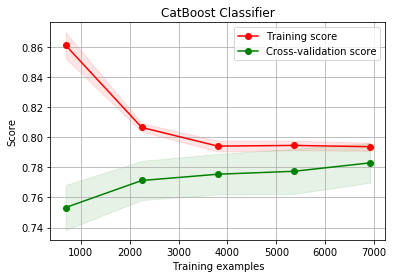

In [180]:
plot_learning_curve(CBC,"CatBoost Classifier",X,Y,cv=kfold)

# Cleaning the test data

Doing exactly what I did on the train data on the test data.

In [79]:
#transform the test data 

dftest = pd.read_csv('test_technidus_clf.csv')
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 25 columns):
CustomerID              3328 non-null int64
Title                   21 non-null object
FirstName               3328 non-null object
MiddleName              1896 non-null object
LastName                3328 non-null object
Suffix                  1 non-null object
AddressLine1            3328 non-null object
AddressLine2            48 non-null object
City                    3328 non-null object
StateProvinceName       3328 non-null object
CountryRegionName       3328 non-null object
PostalCode              3328 non-null object
PhoneNumber             3328 non-null object
BirthDate               3328 non-null object
Education               3328 non-null object
Occupation              3328 non-null object
Gender                  3328 non-null object
MaritalStatus           3328 non-null object
HomeOwnerFlag           3328 non-null int64
NumberCarsOwned         3328 non-null int64
Num

In [80]:
dftest[['NumberCarsOwned', 'NumberChildrenAtHome','HomeOwnerFlag']] = dftest[['NumberCarsOwned', 
                                                                              'NumberChildrenAtHome',
                                                                              'HomeOwnerFlag']].values.astype('float64')
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 25 columns):
CustomerID              3328 non-null int64
Title                   21 non-null object
FirstName               3328 non-null object
MiddleName              1896 non-null object
LastName                3328 non-null object
Suffix                  1 non-null object
AddressLine1            3328 non-null object
AddressLine2            48 non-null object
City                    3328 non-null object
StateProvinceName       3328 non-null object
CountryRegionName       3328 non-null object
PostalCode              3328 non-null object
PhoneNumber             3328 non-null object
BirthDate               3328 non-null object
Education               3328 non-null object
Occupation              3328 non-null object
Gender                  3328 non-null object
MaritalStatus           3328 non-null object
HomeOwnerFlag           3328 non-null float64
NumberCarsOwned         3328 non-null float64

In [81]:
#We can see that we have been given birthdates of our customers instead of their age, however we can derive their age with this 
#We will need to convert the birthdate which is stored as a sring object into a datetime data type, so we can get an age column out of it
dftest.BirthDate = pd.to_datetime(dftest.BirthDate, format='%m/%d/%Y')
print(dftest.BirthDate.dtype) #check to see if the conversion was sucessful

#now that it is converted we can get the age of the customers 
dftest['Age'] = pd.to_datetime('today').year - dftest.BirthDate.dt.year
dftest['Age'].head(4) #check

datetime64[ns]


0    63
1    79
2    52
3    67
Name: Age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bc825f8>,
      dtype=object)

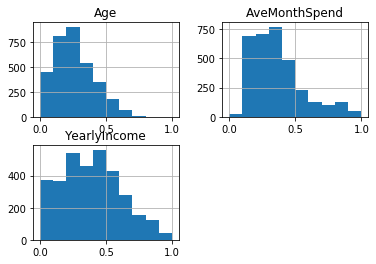

In [82]:

dftest['AveMonthSpend'] =  scaler.fit_transform(dftest['AveMonthSpend'].values.reshape(-1,1))
dftest['Age'] =  scaler.fit_transform(dftest['Age'].values.reshape(-1,1))
dftest['YearlyIncome'] =  scaler.fit_transform(dftest['YearlyIncome'].values.reshape(-1,1))
dftest[['AveMonthSpend','Age','YearlyIncome']].hist()


In [83]:
dftest.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,28611,NaN,Christian,C,Alexander,NaN,3985 Jacqueline Drive,NaN,Salem,Oregon,...,M,S,1.0,2.0,0.0,2,0.266123,0.300000,NaN,0.347826
1,24635,NaN,Gabrielle,NaN,Rogers,NaN,2012 Melody Dr,NaN,San Gabriel,California,...,F,S,1.0,2.0,0.0,3,0.405104,0.140000,NaN,0.579710
2,28178,NaN,Katherine,NaN,James,NaN,5806 West Slough Rd,NaN,Victoria,British Columbia,...,F,S,0.0,1.0,0.0,0,0.360975,0.160000,NaN,0.188406
3,24991,NaN,Luke,NaN,Bryant,NaN,6978 Hoke Dr,NaN,Issaquah,Washington,...,M,S,1.0,2.0,1.0,2,0.410123,0.420000,NaN,0.405797
4,24113,NaN,Stephanie,NaN,Green,NaN,"22, quai Paul Doumer",NaN,Versailles,Yveline,...,F,S,0.0,1.0,0.0,1,0.191611,0.146667,NaN,0.260870


In [84]:
test_X = dftest[['CountryRegionName','Age', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'YearlyIncome',
       'AveMonthSpend']]

In [85]:
col = ['CountryRegionName', 'Education', 'Occupation', 'Gender',
       'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome']
test_X=pd.get_dummies(test_X, columns=col,prefix=col)

In [ ]:
test_X.head()

# ENSEMBLE MODELS

# VC

In [125]:
from sklearn.ensemble import VotingClassifier




classifiers = [('LR',LR),('DT',DT), 
               ('RF',RF),('CBC',CBC),
               ('ADC_DT',ADC_DT),
               ('GB',GB),
               ('XBC', XBC)]

VC_model = VotingClassifier(classifiers, voting = 'soft')
VC_model.fit(X_train, y_train)

0:	learn: 0.6566923	total: 10.1ms	remaining: 1s
1:	learn: 0.6290836	total: 18.5ms	remaining: 905ms
2:	learn: 0.6064462	total: 28.7ms	remaining: 927ms
3:	learn: 0.5848025	total: 38.1ms	remaining: 914ms
4:	learn: 0.5699098	total: 45.9ms	remaining: 872ms
5:	learn: 0.5557435	total: 55.2ms	remaining: 864ms
6:	learn: 0.5441534	total: 65.5ms	remaining: 870ms
7:	learn: 0.5342137	total: 74.8ms	remaining: 860ms
8:	learn: 0.5267029	total: 84.1ms	remaining: 850ms
9:	learn: 0.5200011	total: 93.4ms	remaining: 841ms
10:	learn: 0.5159661	total: 105ms	remaining: 850ms
11:	learn: 0.5096617	total: 115ms	remaining: 845ms
12:	learn: 0.5053713	total: 126ms	remaining: 841ms
13:	learn: 0.5007022	total: 137ms	remaining: 840ms
14:	learn: 0.4985890	total: 146ms	remaining: 826ms
15:	learn: 0.4962744	total: 155ms	remaining: 813ms
16:	learn: 0.4941792	total: 163ms	remaining: 798ms
17:	learn: 0.4910603	total: 174ms	remaining: 795ms
18:	learn: 0.4888363	total: 182ms	remaining: 777ms
19:	learn: 0.4848568	total: 190ms	

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=191, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DT',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=...
                                        

In [139]:
cross_val(VC_model, X,Y)

0:	learn: 0.6574515	total: 17.9ms	remaining: 1.77s
1:	learn: 0.6258576	total: 29.6ms	remaining: 1.45s
2:	learn: 0.6030240	total: 40.7ms	remaining: 1.32s
3:	learn: 0.5840068	total: 52.7ms	remaining: 1.26s
4:	learn: 0.5683185	total: 66.3ms	remaining: 1.26s
5:	learn: 0.5561867	total: 83.1ms	remaining: 1.3s
6:	learn: 0.5438550	total: 98.8ms	remaining: 1.31s
7:	learn: 0.5341193	total: 114ms	remaining: 1.31s
8:	learn: 0.5243627	total: 132ms	remaining: 1.33s
9:	learn: 0.5182596	total: 141ms	remaining: 1.27s
10:	learn: 0.5129440	total: 153ms	remaining: 1.24s
11:	learn: 0.5089763	total: 162ms	remaining: 1.19s
12:	learn: 0.5048094	total: 174ms	remaining: 1.16s
13:	learn: 0.5020268	total: 183ms	remaining: 1.12s
14:	learn: 0.4988340	total: 192ms	remaining: 1.09s
15:	learn: 0.4953077	total: 202ms	remaining: 1.06s
16:	learn: 0.4933627	total: 212ms	remaining: 1.03s
17:	learn: 0.4910478	total: 223ms	remaining: 1.02s
18:	learn: 0.4885863	total: 238ms	remaining: 1.01s
19:	learn: 0.4857106	total: 250ms	r

68:	learn: 0.4420137	total: 856ms	remaining: 385ms
69:	learn: 0.4417048	total: 873ms	remaining: 374ms
70:	learn: 0.4413328	total: 892ms	remaining: 364ms
71:	learn: 0.4411192	total: 905ms	remaining: 352ms
72:	learn: 0.4405565	total: 917ms	remaining: 339ms
73:	learn: 0.4403365	total: 928ms	remaining: 326ms
74:	learn: 0.4400118	total: 942ms	remaining: 314ms
75:	learn: 0.4398632	total: 955ms	remaining: 301ms
76:	learn: 0.4395033	total: 968ms	remaining: 289ms
77:	learn: 0.4393996	total: 978ms	remaining: 276ms
78:	learn: 0.4390520	total: 989ms	remaining: 263ms
79:	learn: 0.4388328	total: 1s	remaining: 251ms
80:	learn: 0.4385840	total: 1.01s	remaining: 238ms
81:	learn: 0.4380816	total: 1.03s	remaining: 225ms
82:	learn: 0.4379639	total: 1.05s	remaining: 214ms
83:	learn: 0.4376184	total: 1.06s	remaining: 202ms
84:	learn: 0.4371669	total: 1.07s	remaining: 189ms
85:	learn: 0.4366484	total: 1.09s	remaining: 177ms
86:	learn: 0.4364590	total: 1.1s	remaining: 165ms
87:	learn: 0.4361217	total: 1.11s	r

34:	learn: 0.4683395	total: 432ms	remaining: 803ms
35:	learn: 0.4675334	total: 449ms	remaining: 798ms
36:	learn: 0.4669580	total: 466ms	remaining: 793ms
37:	learn: 0.4659487	total: 475ms	remaining: 775ms
38:	learn: 0.4653958	total: 486ms	remaining: 760ms
39:	learn: 0.4644335	total: 499ms	remaining: 748ms
40:	learn: 0.4642827	total: 507ms	remaining: 730ms
41:	learn: 0.4636692	total: 520ms	remaining: 718ms
42:	learn: 0.4628739	total: 532ms	remaining: 705ms
43:	learn: 0.4626271	total: 545ms	remaining: 694ms
44:	learn: 0.4621870	total: 554ms	remaining: 677ms
45:	learn: 0.4617925	total: 568ms	remaining: 667ms
46:	learn: 0.4614589	total: 581ms	remaining: 656ms
47:	learn: 0.4583919	total: 590ms	remaining: 639ms
48:	learn: 0.4577336	total: 602ms	remaining: 627ms
49:	learn: 0.4574829	total: 613ms	remaining: 613ms
50:	learn: 0.4564123	total: 623ms	remaining: 598ms
51:	learn: 0.4557054	total: 632ms	remaining: 584ms
52:	learn: 0.4551068	total: 651ms	remaining: 577ms
53:	learn: 0.4546433	total: 667

97:	learn: 0.4373367	total: 1.54s	remaining: 31.4ms
98:	learn: 0.4371028	total: 1.55s	remaining: 15.6ms
99:	learn: 0.4369740	total: 1.56s	remaining: 0us
[-0.7633289986996099, -0.7794404684450228, -0.7690305790500976, -0.7878985035783995, -0.7845052083333334]
-0.7768407516212926


In [ ]:
plot_learning_curve(VC_model,"VC_modelALL",X,Y,cv=kfold)

# STACKING 

In [185]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier


base_models = [CBC, XBC, ADC_DT]

blending_model = LogisticRegression()

sc = StackingCVClassifier(base_models, 
                        blending_model,use_probas=True, random_state = 42)

sc.fit(X_train_m, y_train)



0:	learn: 0.6559179	total: 16.6ms	remaining: 1.86s
1:	learn: 0.6270053	total: 36.6ms	remaining: 2.03s
2:	learn: 0.6004290	total: 54.5ms	remaining: 2s
3:	learn: 0.5811987	total: 67.2ms	remaining: 1.83s
4:	learn: 0.5655361	total: 80.9ms	remaining: 1.75s
5:	learn: 0.5495632	total: 96.2ms	remaining: 1.72s
6:	learn: 0.5384112	total: 111ms	remaining: 1.69s
7:	learn: 0.5288891	total: 125ms	remaining: 1.64s
8:	learn: 0.5207297	total: 140ms	remaining: 1.61s
9:	learn: 0.5106639	total: 155ms	remaining: 1.59s
10:	learn: 0.5006852	total: 171ms	remaining: 1.58s
11:	learn: 0.4950426	total: 187ms	remaining: 1.57s
12:	learn: 0.4917353	total: 201ms	remaining: 1.55s
13:	learn: 0.4890247	total: 223ms	remaining: 1.58s
14:	learn: 0.4851990	total: 237ms	remaining: 1.55s
15:	learn: 0.4835350	total: 247ms	remaining: 1.5s
16:	learn: 0.4804959	total: 260ms	remaining: 1.47s
17:	learn: 0.4778395	total: 271ms	remaining: 1.43s
18:	learn: 0.4741635	total: 288ms	remaining: 1.42s
19:	learn: 0.4705484	total: 302ms	remai

55:	learn: 0.4361920	total: 853ms	remaining: 869ms
56:	learn: 0.4355059	total: 867ms	remaining: 852ms
57:	learn: 0.4352088	total: 882ms	remaining: 836ms
58:	learn: 0.4347572	total: 896ms	remaining: 820ms
59:	learn: 0.4337882	total: 909ms	remaining: 803ms
60:	learn: 0.4329272	total: 923ms	remaining: 787ms
61:	learn: 0.4322887	total: 938ms	remaining: 771ms
62:	learn: 0.4312696	total: 952ms	remaining: 756ms
63:	learn: 0.4308986	total: 969ms	remaining: 742ms
64:	learn: 0.4304781	total: 983ms	remaining: 726ms
65:	learn: 0.4299824	total: 1s	remaining: 714ms
66:	learn: 0.4292200	total: 1.02s	remaining: 698ms
67:	learn: 0.4285632	total: 1.03s	remaining: 683ms
68:	learn: 0.4281035	total: 1.05s	remaining: 668ms
69:	learn: 0.4275256	total: 1.06s	remaining: 653ms
70:	learn: 0.4269024	total: 1.08s	remaining: 637ms
71:	learn: 0.4263040	total: 1.09s	remaining: 623ms
72:	learn: 0.4260727	total: 1.11s	remaining: 609ms
73:	learn: 0.4256830	total: 1.13s	remaining: 593ms
74:	learn: 0.4248915	total: 1.15s	

107:	learn: 0.4231657	total: 1.24s	remaining: 57.3ms
108:	learn: 0.4229142	total: 1.25s	remaining: 46ms
109:	learn: 0.4226530	total: 1.27s	remaining: 34.5ms
110:	learn: 0.4223059	total: 1.28s	remaining: 23ms
111:	learn: 0.4218495	total: 1.29s	remaining: 11.5ms
112:	learn: 0.4215725	total: 1.3s	remaining: 0us


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x13f7d0ba8>,
                                  XGBClassifier(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=14,
                                                learning_rate=0.2590944910174349,
                                                max_delta_step=0, max_depth=18,
                                                min_child_weight=1,
                                                missing=None, n_estimators=902,
                                                n_jobs=1, nthread=None,
                                                objective='bina...
                                                        fit_intercept=True,
                                      

In [186]:
cross_val(sc, X.values,Y)

0:	learn: 0.6553082	total: 9ms	remaining: 1.01s
1:	learn: 0.6274020	total: 18.8ms	remaining: 1.04s
2:	learn: 0.6012602	total: 28.7ms	remaining: 1.05s
3:	learn: 0.5810624	total: 37.6ms	remaining: 1.02s
4:	learn: 0.5677889	total: 45.4ms	remaining: 980ms
5:	learn: 0.5559053	total: 54.7ms	remaining: 975ms
6:	learn: 0.5458709	total: 65.3ms	remaining: 989ms
7:	learn: 0.5348487	total: 74.8ms	remaining: 982ms
8:	learn: 0.5274863	total: 85.1ms	remaining: 983ms
9:	learn: 0.5199170	total: 93.7ms	remaining: 965ms
10:	learn: 0.5136848	total: 104ms	remaining: 964ms
11:	learn: 0.5079623	total: 113ms	remaining: 947ms
12:	learn: 0.5056151	total: 122ms	remaining: 939ms
13:	learn: 0.5007206	total: 132ms	remaining: 933ms
14:	learn: 0.4979789	total: 142ms	remaining: 927ms
15:	learn: 0.4945619	total: 152ms	remaining: 923ms
16:	learn: 0.4915322	total: 162ms	remaining: 912ms
17:	learn: 0.4893011	total: 173ms	remaining: 914ms
18:	learn: 0.4868612	total: 184ms	remaining: 909ms
19:	learn: 0.4837070	total: 192ms	

63:	learn: 0.4232735	total: 895ms	remaining: 685ms
64:	learn: 0.4227572	total: 924ms	remaining: 683ms
65:	learn: 0.4213506	total: 939ms	remaining: 669ms
66:	learn: 0.4208243	total: 958ms	remaining: 658ms
67:	learn: 0.4204935	total: 979ms	remaining: 648ms
68:	learn: 0.4201275	total: 994ms	remaining: 634ms
69:	learn: 0.4198866	total: 1.01s	remaining: 619ms
70:	learn: 0.4191789	total: 1.02s	remaining: 606ms
71:	learn: 0.4190014	total: 1.04s	remaining: 592ms
72:	learn: 0.4183071	total: 1.05s	remaining: 576ms
73:	learn: 0.4181758	total: 1.06s	remaining: 560ms
74:	learn: 0.4178621	total: 1.07s	remaining: 543ms
75:	learn: 0.4174942	total: 1.08s	remaining: 527ms
76:	learn: 0.4170717	total: 1.09s	remaining: 511ms
77:	learn: 0.4163996	total: 1.1s	remaining: 496ms
78:	learn: 0.4158843	total: 1.12s	remaining: 481ms
79:	learn: 0.4153711	total: 1.13s	remaining: 466ms
80:	learn: 0.4145313	total: 1.14s	remaining: 450ms
81:	learn: 0.4142592	total: 1.15s	remaining: 434ms
82:	learn: 0.4134708	total: 1.16

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0:	learn: 0.6529764	total: 13.1ms	remaining: 1.47s
1:	learn: 0.6226058	total: 25.4ms	remaining: 1.41s
2:	learn: 0.5942964	total: 35.6ms	remaining: 1.3s
3:	learn: 0.5721732	total: 45.1ms	remaining: 1.23s
4:	learn: 0.5563254	total: 61.1ms	remaining: 1.32s
5:	learn: 0.5389411	total: 78.8ms	remaining: 1.41s
6:	learn: 0.5299932	total: 93.1ms	remaining: 1.41s
7:	learn: 0.5198266	total: 113ms	remaining: 1.48s
8:	learn: 0.5112859	total: 129ms	remaining: 1.49s
9:	learn: 0.5043619	total: 138ms	remaining: 1.43s
10:	learn: 0.4978246	total: 149ms	remaining: 1.38s
11:	learn: 0.4933073	total: 159ms	remaining: 1.34s
12:	learn: 0.4878473	total: 169ms	remaining: 1.3s
13:	learn: 0.4843250	total: 187ms	remaining: 1.32s
14:	learn: 0.4808326	total: 200ms	remaining: 1.31s
15:	learn: 0.4778759	total: 215ms	remaining: 1.3s
16:	learn: 0.4757908	total: 231ms	remaining: 1.3s
17:	learn: 0.4738807	total: 248ms	remaining: 1.31s
18:	learn: 0.4719119	total: 260ms	remaining: 1.29s
19:	learn: 0.4698892	total: 270ms	rema

63:	learn: 0.4277408	total: 873ms	remaining: 668ms
64:	learn: 0.4269786	total: 889ms	remaining: 656ms
65:	learn: 0.4266077	total: 901ms	remaining: 642ms
66:	learn: 0.4259065	total: 912ms	remaining: 626ms
67:	learn: 0.4252939	total: 924ms	remaining: 611ms
68:	learn: 0.4249311	total: 935ms	remaining: 596ms
69:	learn: 0.4243003	total: 946ms	remaining: 581ms
70:	learn: 0.4238059	total: 960ms	remaining: 568ms
71:	learn: 0.4235286	total: 970ms	remaining: 552ms
72:	learn: 0.4230846	total: 979ms	remaining: 537ms
73:	learn: 0.4226203	total: 989ms	remaining: 521ms
74:	learn: 0.4221008	total: 999ms	remaining: 506ms
75:	learn: 0.4214139	total: 1.01s	remaining: 491ms
76:	learn: 0.4210275	total: 1.02s	remaining: 477ms
77:	learn: 0.4206580	total: 1.03s	remaining: 462ms
78:	learn: 0.4203562	total: 1.04s	remaining: 447ms
79:	learn: 0.4201829	total: 1.05s	remaining: 433ms
80:	learn: 0.4198797	total: 1.06s	remaining: 419ms
81:	learn: 0.4196974	total: 1.07s	remaining: 406ms
82:	learn: 0.4192347	total: 1.0

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0:	learn: 0.6536157	total: 12.2ms	remaining: 1.36s
1:	learn: 0.6269467	total: 24.2ms	remaining: 1.34s
2:	learn: 0.5982425	total: 35.7ms	remaining: 1.31s
3:	learn: 0.5732243	total: 47.2ms	remaining: 1.29s
4:	learn: 0.5544854	total: 58.8ms	remaining: 1.27s
5:	learn: 0.5411080	total: 70.3ms	remaining: 1.25s
6:	learn: 0.5343610	total: 80.4ms	remaining: 1.22s
7:	learn: 0.5224087	total: 94.7ms	remaining: 1.24s
8:	learn: 0.5142202	total: 111ms	remaining: 1.28s
9:	learn: 0.5087922	total: 124ms	remaining: 1.27s
10:	learn: 0.5035093	total: 137ms	remaining: 1.27s
11:	learn: 0.4971923	total: 146ms	remaining: 1.23s
12:	learn: 0.4912285	total: 156ms	remaining: 1.2s
13:	learn: 0.4864680	total: 165ms	remaining: 1.16s
14:	learn: 0.4832477	total: 174ms	remaining: 1.14s
15:	learn: 0.4801974	total: 183ms	remaining: 1.11s
16:	learn: 0.4777746	total: 192ms	remaining: 1.08s
17:	learn: 0.4759258	total: 201ms	remaining: 1.06s
18:	learn: 0.4737446	total: 211ms	remaining: 1.04s
19:	learn: 0.4715640	total: 224ms	

65:	learn: 0.4320491	total: 622ms	remaining: 443ms
66:	learn: 0.4316252	total: 636ms	remaining: 436ms
67:	learn: 0.4307089	total: 644ms	remaining: 426ms
68:	learn: 0.4304127	total: 656ms	remaining: 418ms
69:	learn: 0.4283813	total: 665ms	remaining: 409ms
70:	learn: 0.4279053	total: 675ms	remaining: 399ms
71:	learn: 0.4276277	total: 684ms	remaining: 389ms
72:	learn: 0.4270963	total: 691ms	remaining: 379ms
73:	learn: 0.4264317	total: 700ms	remaining: 369ms
74:	learn: 0.4261136	total: 709ms	remaining: 359ms
75:	learn: 0.4256929	total: 718ms	remaining: 350ms
76:	learn: 0.4253954	total: 728ms	remaining: 340ms
77:	learn: 0.4249644	total: 737ms	remaining: 330ms
78:	learn: 0.4244537	total: 746ms	remaining: 321ms
79:	learn: 0.4238627	total: 755ms	remaining: 311ms
80:	learn: 0.4234449	total: 764ms	remaining: 302ms
81:	learn: 0.4232480	total: 771ms	remaining: 292ms
82:	learn: 0.4214075	total: 780ms	remaining: 282ms
83:	learn: 0.4210086	total: 789ms	remaining: 273ms
84:	learn: 0.4201501	total: 799

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0:	learn: 0.6507513	total: 14.7ms	remaining: 1.64s
1:	learn: 0.6244712	total: 29.9ms	remaining: 1.66s
2:	learn: 0.5967365	total: 41.6ms	remaining: 1.52s
3:	learn: 0.5735927	total: 56.4ms	remaining: 1.54s
4:	learn: 0.5580367	total: 66.3ms	remaining: 1.43s
5:	learn: 0.5437217	total: 76.2ms	remaining: 1.36s
6:	learn: 0.5296501	total: 90.3ms	remaining: 1.37s
7:	learn: 0.5202183	total: 106ms	remaining: 1.38s
8:	learn: 0.5132328	total: 120ms	remaining: 1.38s
9:	learn: 0.5079746	total: 131ms	remaining: 1.35s
10:	learn: 0.5014955	total: 140ms	remaining: 1.3s
11:	learn: 0.4967127	total: 149ms	remaining: 1.26s
12:	learn: 0.4923546	total: 159ms	remaining: 1.22s
13:	learn: 0.4892142	total: 168ms	remaining: 1.19s
14:	learn: 0.4855189	total: 176ms	remaining: 1.15s
15:	learn: 0.4820711	total: 185ms	remaining: 1.12s
16:	learn: 0.4786324	total: 194ms	remaining: 1.1s
17:	learn: 0.4766654	total: 202ms	remaining: 1.07s
18:	learn: 0.4749569	total: 212ms	remaining: 1.05s
19:	learn: 0.4732003	total: 225ms	re

64:	learn: 0.4325264	total: 636ms	remaining: 470ms
65:	learn: 0.4320412	total: 649ms	remaining: 462ms
66:	learn: 0.4316586	total: 662ms	remaining: 454ms
67:	learn: 0.4315249	total: 671ms	remaining: 444ms
68:	learn: 0.4311864	total: 681ms	remaining: 434ms
69:	learn: 0.4307127	total: 691ms	remaining: 425ms
70:	learn: 0.4304894	total: 701ms	remaining: 414ms
71:	learn: 0.4300203	total: 710ms	remaining: 404ms
72:	learn: 0.4295723	total: 717ms	remaining: 393ms
73:	learn: 0.4291961	total: 723ms	remaining: 381ms
74:	learn: 0.4288545	total: 733ms	remaining: 371ms
75:	learn: 0.4271467	total: 741ms	remaining: 361ms
76:	learn: 0.4268565	total: 750ms	remaining: 351ms
77:	learn: 0.4266220	total: 759ms	remaining: 341ms
78:	learn: 0.4260776	total: 770ms	remaining: 331ms
79:	learn: 0.4258625	total: 779ms	remaining: 321ms
80:	learn: 0.4254368	total: 787ms	remaining: 311ms
81:	learn: 0.4247038	total: 796ms	remaining: 301ms
82:	learn: 0.4243311	total: 805ms	remaining: 291ms
83:	learn: 0.4240964	total: 814

/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0:	learn: 0.6607220	total: 20.3ms	remaining: 2.27s
1:	learn: 0.6265471	total: 35.4ms	remaining: 1.96s
2:	learn: 0.5972374	total: 49.8ms	remaining: 1.82s
3:	learn: 0.5792592	total: 63.9ms	remaining: 1.74s
4:	learn: 0.5677368	total: 77.9ms	remaining: 1.68s
5:	learn: 0.5568591	total: 93.4ms	remaining: 1.67s
6:	learn: 0.5461938	total: 105ms	remaining: 1.59s
7:	learn: 0.5354288	total: 117ms	remaining: 1.53s
8:	learn: 0.5283422	total: 125ms	remaining: 1.45s
9:	learn: 0.5212123	total: 135ms	remaining: 1.39s
10:	learn: 0.5153283	total: 145ms	remaining: 1.34s
11:	learn: 0.5066482	total: 152ms	remaining: 1.28s
12:	learn: 0.5023227	total: 161ms	remaining: 1.24s
13:	learn: 0.4973653	total: 169ms	remaining: 1.2s
14:	learn: 0.4926860	total: 178ms	remaining: 1.16s
15:	learn: 0.4898483	total: 187ms	remaining: 1.13s
16:	learn: 0.4872485	total: 196ms	remaining: 1.1s
17:	learn: 0.4851956	total: 205ms	remaining: 1.08s
18:	learn: 0.4824568	total: 214ms	remaining: 1.06s
19:	learn: 0.4796954	total: 226ms	rem

49:	learn: 0.4303497	total: 470ms	remaining: 592ms
50:	learn: 0.4297068	total: 486ms	remaining: 590ms
51:	learn: 0.4288255	total: 497ms	remaining: 583ms
52:	learn: 0.4284655	total: 507ms	remaining: 574ms
53:	learn: 0.4264565	total: 514ms	remaining: 562ms
54:	learn: 0.4252963	total: 524ms	remaining: 552ms
55:	learn: 0.4248069	total: 533ms	remaining: 543ms
56:	learn: 0.4243804	total: 542ms	remaining: 532ms
57:	learn: 0.4241900	total: 551ms	remaining: 523ms
58:	learn: 0.4239545	total: 561ms	remaining: 513ms
59:	learn: 0.4232110	total: 570ms	remaining: 503ms
60:	learn: 0.4228361	total: 578ms	remaining: 493ms
61:	learn: 0.4226105	total: 587ms	remaining: 483ms
62:	learn: 0.4223399	total: 596ms	remaining: 473ms
63:	learn: 0.4219835	total: 604ms	remaining: 463ms
64:	learn: 0.4217125	total: 613ms	remaining: 453ms
65:	learn: 0.4212734	total: 623ms	remaining: 444ms
66:	learn: 0.4209061	total: 632ms	remaining: 434ms
67:	learn: 0.4205727	total: 641ms	remaining: 424ms
68:	learn: 0.4202834	total: 650

108:	learn: 0.4261638	total: 1.23s	remaining: 45ms
109:	learn: 0.4259493	total: 1.24s	remaining: 33.8ms
110:	learn: 0.4257585	total: 1.25s	remaining: 22.6ms
111:	learn: 0.4254374	total: 1.26s	remaining: 11.3ms
112:	learn: 0.4251203	total: 1.27s	remaining: 0us
[-0.7659297789336801, -0.7768379960962914, -0.7774886141834743, -0.7833441769681198, -0.787109375]
-0.7781419882363132


/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<module 'matplotlib.pyplot' from '/Users/samanthasam-inimgba/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

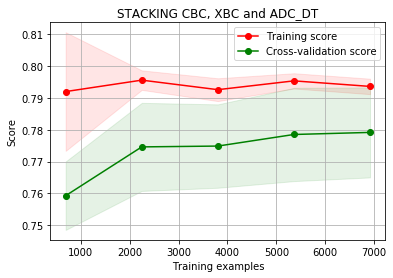

In [196]:
plot_learning_curve(sc,"STACKING CBC, XBC and ADC_DT",X.values,Y,cv=kfold)

# MODEL SELECTED 


I went for models that had high CV scores, but I noticed that when i submitted them they were low on the leaderboard. So it got me to underststand that high CV accuracy scores where not sufficient test of how well my model was performing. So I decided to look at the learning curves and chose my models based on that.

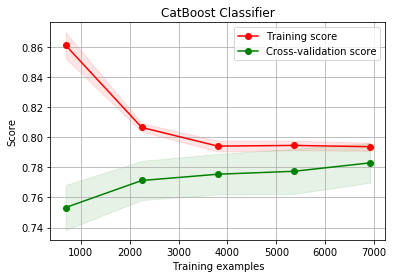

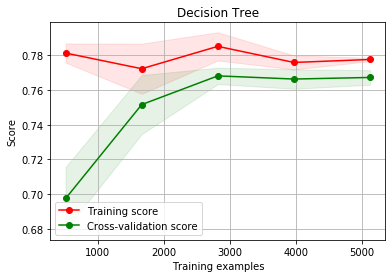

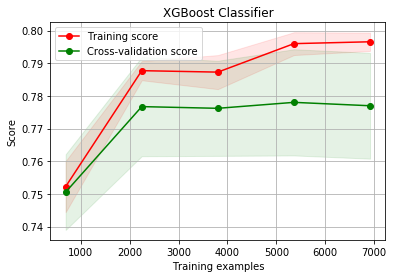

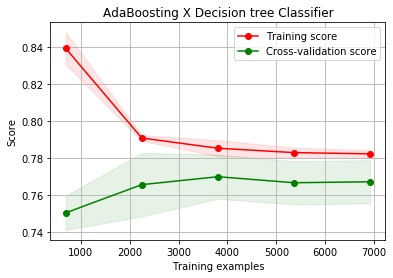

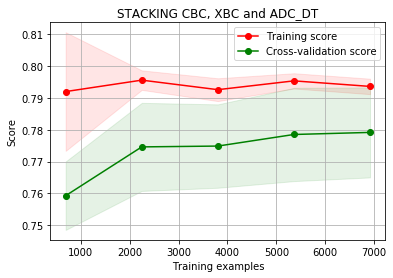

In [245]:
from PIL import Image
from IPython.display import display, HTML

images = ["CBC.png", "DT.png","XBC.png","ADC_DT.png","SC.png"]



for image in images:
    img = Image.open(image)
    display(img);


I chose the models where the training and validation picked up and/or the gap between the training and cross-validation was not too wide. The CBC  performed best (0.76738) and looked best, but on the public leaderboard it had a score of 0.7459 so naively I didnt choose it as my final model. 

But now I know better lol